In [1]:
import multiprocess as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc

In [2]:
basedir = './국토교통부_건축물대장_표제부/'
bdinfo_df = pd.read_csv(basedir + 'simple_sorted.csv')
print(bdinfo_df.shape)
bdinfo_df.head()

(149344, 55)


c:\users\max6296\ml\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용


In [7]:
print(bdinfo_df.shape)
bdinfo_df = bdinfo_df[bdinfo_df['건축_면적(㎡)'] != 0].reset_index(drop=True)
bdinfo_df.shape

(149344, 55)


(139724, 55)

In [8]:
nothing_df = bdinfo_df[(bdinfo_df['가구_수(가구)'] == 0)&(bdinfo_df['세대_수(세대)'] == 0)&(bdinfo_df['호_수(호)'] == 0)]
nothing_df.shape

(157, 55)

In [9]:
bdinfo_df = bdinfo_df.drop(nothing_df.index)
print(bdinfo_df.shape)

(139567, 55)


In [10]:
bdinfo_df['기타_용도'] = bdinfo_df['기타_용도'].fillna(bdinfo_df['주_용도'])
bdinfo_df['기타_용도'].isna().sum()

0

In [512]:
def extract_etc_housetype(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        
        if len(splitted) != 1:
            for s in splitted:
                s = s.replace(' ', '')
                x_list.append(s)
        else:
            x_list.append(x)
        
        for v in x_list:
            if ((('원룸' in v)|('월룸' in v))|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
                return '원룸형아파트'
            elif '아파' in v:
                return '일반아파트'
            elif (('원룸' in v)|('월룸' in v))&(('도시' in v)|('도사' in v)|('도형' in v)):
                return '도시형원룸'
            elif (('원룸' in v)|('월룸' in v)):
                return '일반원룸'
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
                return '도시형다세대'
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
                return '도시형연립'
            elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
                return '일반다세대'
            elif ('연립' in v)|('얀립' in v):
                return '일반연립'
            elif '오피' in v:
                return '오피스텔'
            elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
                return '단독주택'
            elif '협동' in v:
                return '협동주택'
            
        for v in x_list:
            if ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
                return '도시형unknown'
            elif ('공동' in v)|('공둥' in v):
                return '공동주택'
            elif '주택' in v:
                return '주택unknown'
            
        
        return '주택unknown'

In [513]:
bdinfo_df['기타용도_주택종류'] = bdinfo_df['기타_용도'].apply(extract_etc_housetype)

In [ ]:
def extract_useful_info_test(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        
        if len(splitted) != 1:
            for s in splitted:
                s = s.replace(' ', '')
                x_list.append(s)
        else:
            x_list.append(x)
        
        for v in x_list:
            if ((('원룸' in v)|('월룸' in v))|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
                return v
            elif '아파' in v:
                return v
            elif (('원룸' in v)|('월룸' in v))&(('도시' in v)|('도사' in v)|('도형' in v)):
                return v
            elif (('원룸' in v)|('월룸' in v)):
                return v
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
                return v
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
                return v
            elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
                return v
            elif ('연립' in v)|('얀립' in v):
                return v
            elif '오피' in v:
                return v
            elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
                return v
            elif '협동' in v:
                return v
            
        for v in x_list:
            if ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
                return v
            elif ('공동' in v)|('공둥' in v):
                return v
            elif '주택' in v:
                return v
            
        
        return x

In [ ]:
bdinfo_df['기타용도_주택종류_test'] = bdinfo_df['기타_용도'].apply(extract_useful_info_test)

In [13]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트


In [545]:
def extract_etc_first(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        if len(splitted) == 1:
            v = x
        else:
            v = splitted[0]        
        
        # 주택
        if ((('원룸' in v)|('월룸' in v))|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
            return '원룸형아파트'
        elif '아파' in v:
            return '일반아파트'
        elif (('원룸' in v)|('월룸' in v))&(('도시' in v)|('도사' in v)|('도형' in v)):
            return '도시형원룸'
        elif (('원룸' in v)|('월룸' in v)):
            return '일반원룸'
        elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
            return '도시형다세대'
        elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
            return '도시형연립'
        elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
            return '일반다세대'
        elif ('연립' in v)|('얀립' in v):
            return '일반연립'
        elif '오피' in v:
            return '오피스텔'
        elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
            return '단독주택'
        elif '협동' in v:
            return '협동주택'
        elif ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
            return '도시형unknown'
        elif ('공동' in v)|('공둥' in v):
            return '공동주택'
        elif ('주택' in v)|('주거' in v):
            return '주택unknown'
        elif ((('１' in v)|('1' in v)) & ('근' in v))|('제1' in v)|(v == '1')|('목욕' in v)|(('휴게' in v)&('음식' in v))\
        |('슈퍼' in v)|('수퍼' in v)|('마켓' in v)|('일용품' in v)|('제과' in v)|('이용원' in v)|('미용' in v)|('의' in v)\
        |('접골' in v)|('조산' in v)|('체육' in v)|('탁구' in v)|('동사' in v)|('경찰' in v)|('소방서' in v)|('도서' in v)\
        |('화장' in v)|('독서' in v)|('소매' in v)|('상' in v)|('점' in v)|('시장' in v)|('판매' in v)|('구매' in v)|('약국' in v)\
        |('침술' in v)|('변소' in v)|('1종' in v):
            return '1종근린'
        elif (('2' in v) & ('근' in v))|('제2' in v)|(v == '2')|('음식' in v)|('사무' in v)|('업' in v)|('학원' in v)\
        |('동물' in v)|('골프' in v)|('볼링' in v)|('당구' in v)|('낚시' in v)|('은행' in v)|('금융' in v)|('부동' in v)\
        |('사진' in v)|('교육' in v)|('문화' in v)|('운동' in v)|('2종' in v)|('교습' in v):
            return '2종근린'
        elif ('노유' in v)|('아동' in v)|('노인' in v)|('사회' in v)|('근로' in v)|('경로' in v)|('어린' in v)|('보육' in v)\
        |('유치' in v):
            return '노유자시설'
        elif ('부대' in v)|('소방' in v)|('주차' in v)|('차고' in v)|('대피' in v)|('경비' in v)|('관리' in v)|('창고' in v)\
        |('기계' in v)|('지하' in v)|('자동차' in v)|('보일' in v)|('위험' in v)|('오수' in v)|('쓰레기' in v)|('정화' in v)\
        |('저수' in v)|('냉난' in v)|('방범' in v)|('탱크' in v)|('보이라' in v)|('세탁' in v)|('계단' in v)|('다용' in v)\
        |('집회' in v)|('mdf' in v.lower())|('처리' in v)|('펌프' in v)|('전기' in v)|('엠디' in v)|('변전' in v):
            return '부대시설'
        elif ('위락' in v)|('노래' in v)|('주점' in v)|('술' in v)|('다방' in v):
            return '위락시설'
        elif ('종교' in v)|('교회' in v)|(v == '절'):
            return '종교시설'
        elif ('공장' in v):
            return '공장'
        elif ('여인' in v)|('기숙' in v)|('숙박' in v)|('호텔' in v)|('여관' in v)|('숙발' in v):
            return '숙박시설'
        
        
        
        elif ('근' in v)|('편익' in v)|('생' in v)|('복리' in v)|('복지' in v)|('휴게' in v):
            return '근린unknown'
        else:            
            return '기타'

In [546]:
bdinfo_df['첫기타용도'] = bdinfo_df['기타_용도'].apply(extract_etc_first)

In [547]:
bdinfo_df['첫기타용도'].nunique()

24

In [548]:
bdinfo_df['첫기타용도'].value_counts()

일반다세대         59538
공동주택          21832
일반아파트         20580
도시형다세대         8820
주택unknown      7454
일반연립           7085
단독주택           3714
근린unknown      3095
도시형unknown     2081
오피스텔           1546
도시형원룸          1297
2종근린           1200
1종근린            627
협동주택            400
원룸형아파트          157
도시형연립            82
일반원룸             20
부대시설             17
노유자시설             7
숙박시설              5
기타                3
종교시설              3
위락시설              2
공장                2
Name: 첫기타용도, dtype: int64

In [549]:
def extract_etc_second(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        if len(splitted) == 1:
            return '둘째용도없음'
        else:
            v = splitted[1]        
        
        # 주택
        if ((('원룸' in v)|('월룸' in v))|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
            return '원룸형아파트'
        elif '아파' in v:
            return '일반아파트'
        elif (('원룸' in v)|('월룸' in v))&(('도시' in v)|('도사' in v)|('도형' in v)):
            return '도시형원룸'
        elif (('원룸' in v)|('월룸' in v)):
            return '일반원룸'
        elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
            return '도시형다세대'
        elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
            return '도시형연립'
        elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
            return '일반다세대'
        elif ('연립' in v)|('얀립' in v):
            return '일반연립'
        elif '오피' in v:
            return '오피스텔'
        elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
            return '단독주택'
        elif '협동' in v:
            return '협동주택'
        elif ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
            return '도시형unknown'
        elif ('공동' in v)|('공둥' in v):
            return '공동주택'
        elif ('주택' in v)|('주거' in v)|('세대' in v):
            return '주택unknown'
        elif ((('１' in v)|('1' in v)) & ('근' in v))|('제1' in v)|((v == ' 1')|(v == '1'))|('목욕' in v)|(('휴게' in v)&('음식' in v))\
        |('슈퍼' in v)|('수퍼' in v)|('마켓' in v)|('일용품' in v)|('제과' in v)|('이용원' in v)|('미용' in v)|('의' in v)\
        |('접골' in v)|('조산' in v)|('체육' in v)|('탁구' in v)|('동사' in v)|('경찰' in v)|('소방서' in v)|('도서' in v)\
        |('화장' in v)|('독서' in v)|('소매' in v)|('상' in v)|('점' in v)|('시장' in v)|('판매' in v)|('구매' in v)|('약국' in v)\
        |('침술' in v)|('변소' in v)|('1종' in v):
            return '1종근린'
        elif (('2' in v) & ('근' in v))|('제2' in v)|(v == '2')|('음식' in v)|('사무' in v)|('업' in v)|('학원' in v)\
        |('동물' in v)|('골프' in v)|('볼링' in v)|('당구' in v)|('낚시' in v)|('은행' in v)|('금융' in v)|('부동' in v)\
        |('사진' in v)|('교육' in v)|('문화' in v)|('운동' in v)|('2종' in v)|('교습' in v):
            return '2종근린'
        elif ('노유' in v)|('아동' in v)|('노인' in v)|('사회' in v)|('근로' in v)|('경로' in v)|('어린' in v)|('보육' in v)\
        |('유치' in v):
            return '노유자시설'
        elif ('부대' in v)|('소방' in v)|('주차' in v)|('차고' in v)|('대피' in v)|('경비' in v)|('관리' in v)|('창고' in v)\
        |('기계' in v)|('지하' in v)|('자동차' in v)|('보일' in v)|('위험' in v)|('오수' in v)|('쓰레기' in v)|('정화' in v)\
        |('저수' in v)|('냉난' in v)|('방범' in v)|('탱크' in v)|('보이라' in v)|('세탁' in v)|('계단' in v)|('다용' in v)\
        |('집회' in v)|('mdf' in v.lower())|('처리' in v)|('펌프' in v)|('전기' in v)|('엠디' in v)|('변전' in v):
            return '부대시설'
        elif ('위락' in v)|('노래' in v)|('주점' in v)|('술' in v)|('다방' in v):
            return '위락시설'
        elif ('종교' in v)|('교회' in v)|(v == '절'):
            return '종교시설'
        elif '공장' in v:
            return '공장'
        elif ('여인' in v)|('기숙' in v)|('숙박' in v)|('호텔' in v)|('여관' in v)|('숙발' in v):
            return '숙박시설'
        
        
        elif ('근' in v)|('편익' in v)|('생' in v)|('복리' in v)|('복지' in v)|('휴게' in v):
            return '근린unknown'
        else:            
            return '기타'

In [550]:
bdinfo_df['둘째기타용도'] = bdinfo_df['기타_용도'].apply(extract_etc_second)

In [551]:
print(bdinfo_df['둘째기타용도'].nunique())
bdinfo_df['둘째기타용도'].value_counts()

25


둘째용도없음        117851
근린unknown       6315
일반다세대           4205
2종근린            3260
1종근린            2411
도시형다세대          1364
주택unknown        968
오피스텔             860
일반아파트            524
단독주택             332
공동주택             311
도시형unknown       274
부대시설             225
일반연립             206
도시형원룸            152
일반원룸             111
노유자시설             70
기타                49
원룸형아파트            44
숙박시설              10
종교시설               6
도시형연립              6
위락시설               5
협동주택               4
공장                 4
Name: 둘째기타용도, dtype: int64

In [556]:
def extract_etc_third(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        if len(splitted) < 3:
            return '셋째용도없음'
        else:
            v = splitted[2]        
        
        # 주택
        if ((('원룸' in v)|('월룸' in v))|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
            return '원룸형아파트'
        elif '아파' in v:
            return '일반아파트'
        elif (('원룸' in v)|('월룸' in v))&(('도시' in v)|('도사' in v)|('도형' in v)):
            return '도시형원룸'
        elif (('원룸' in v)|('월룸' in v)):
            return '일반원룸'
        elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
            return '도시형다세대'
        elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
            return '도시형연립'
        elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
            return '일반다세대'
        elif ('연립' in v)|('얀립' in v):
            return '일반연립'
        elif '오피' in v:
            return '오피스텔'
        elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
            return '단독주택'
        elif '협동' in v:
            return '협동주택'
        elif ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
            return '도시형unknown'
        elif ('공동' in v)|('공둥' in v):
            return '공동주택'
        elif ('주택' in v)|('주거' in v)|('세대' in v):
            return '주택unknown'
        elif ((('１' in v)|('1' in v)) & ('근' in v))|('제1' in v)|((v == ' 1')|(v == '1'))|('목욕' in v)|(('휴게' in v)&('음식' in v))\
        |('슈퍼' in v)|('수퍼' in v)|('마켓' in v)|('일용품' in v)|('제과' in v)|('이용원' in v)|('미용' in v)|('의' in v)\
        |('접골' in v)|('조산' in v)|('체육' in v)|('탁구' in v)|('동사' in v)|('경찰' in v)|('소방서' in v)|('도서' in v)\
        |('화장' in v)|('독서' in v)|('소매' in v)|('상' in v)|('점' in v)|('시장' in v)|('판매' in v)|('구매' in v)|('약국' in v)\
        |('침술' in v)|('변소' in v)|('1종' in v):
            return '1종근린'
        elif (('2' in v) & ('근' in v))|('제2' in v)|(v == '2')|('음식' in v)|('사무' in v)|('업' in v)|('학원' in v)\
        |('동물' in v)|('골프' in v)|('볼링' in v)|('당구' in v)|('낚시' in v)|('은행' in v)|('금융' in v)|('부동' in v)\
        |('사진' in v)|('교육' in v)|('문화' in v)|('운동' in v)|('2종' in v)|('교습' in v):
            return '2종근린'
        elif ('노유' in v)|('아동' in v)|('노인' in v)|('사회' in v)|('근로' in v)|('경로' in v)|('어린' in v)|('보육' in v)\
        |('유치' in v):
            return '노유자시설'
        elif ('부대' in v)|('소방' in v)|('주차' in v)|('차고' in v)|('대피' in v)|('경비' in v)|('관리' in v)|('창고' in v)\
        |('기계' in v)|('지하' in v)|('자동차' in v)|('보일' in v)|('위험' in v)|('오수' in v)|('쓰레기' in v)|('정화' in v)\
        |('저수' in v)|('냉난' in v)|('방범' in v)|('탱크' in v)|('보이라' in v)|('세탁' in v)|('계단' in v)|('다용' in v)\
        |('집회' in v)|('mdf' in v.lower())|('처리' in v)|('펌프' in v)|('전기' in v)|('엠디' in v)|('변전' in v):
            return '부대시설'
        elif ('위락' in v)|('노래' in v)|('주점' in v)|('술' in v)|('다방' in v):
            return '위락시설'
        elif ('종교' in v)|('교회' in v)|(v == '절'):
            return '종교시설'
        elif '공장' in v:
            return '공장'
        elif ('여인' in v)|('기숙' in v)|('숙박' in v)|('호텔' in v)|('여관' in v)|('숙발' in v):
            return '숙박시설'
        
        
        elif ('근' in v)|('편익' in v)|('생' in v)|('복리' in v)|('복지' in v)|('휴게' in v):
            return '근린unknown'
        else:            
            return '기타'

In [557]:
bdinfo_df['셋째기타용도'] = bdinfo_df['기타_용도'].apply(extract_etc_third)
bdinfo_df['셋째기타용도'].nunique()

25

In [558]:
bdinfo_df['셋째기타용도'].value_counts()

셋째용도없음        136653
근린unknown        857
2종근린             800
1종근린             393
일반다세대            214
오피스텔             109
부대시설              96
주택unknown         68
노유자시설             58
일반아파트             44
도시형다세대            43
도시형unknown        42
일반원룸              38
단독주택              38
도시형원룸             30
공동주택              28
기타                19
일반연립              13
숙박시설               9
원룸형아파트             6
위락시설               4
도시형연립              2
협동주택               1
종교시설               1
공장                 1
Name: 셋째기타용도, dtype: int64

In [559]:
def etc_count(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        if len(splitted) < 3:
            return str(len(splitted))+'개'
        else:
            return '3개이상'        

In [560]:
bdinfo_df['기타용도갯수'] = bdinfo_df['기타_용도'].apply(etc_count)
bdinfo_df['기타용도갯수'].value_counts()

1개      117851
2개       18802
3개이상      2914
Name: 기타용도갯수, dtype: int64

In [561]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개


In [647]:
bdinfo_df['기타_구조'].fillna(bdinfo_df['구조'], inplace=True)

In [563]:
bdinfo_df['기타_구조'].nunique()

1754

In [577]:
bdinfo_df['기타_구조'].value_counts()[500:600]

철근콘크리트(벽식)                   2
철근콘크리트,세멘벽돌                  2
연와조, 조적조                     2
철골콘크리트벽식구조                   2
철근콘크리트조/벽식구조                 2
철근콩크리트                       2
철근콘크리트조(지층-2층), 벽돌조(3층)      2
연와조/샌드위치판넬                   2
철근콘크리트구조, 조립식판넬조             2
R.C(지층-3층), 연와조              2
조적조스라브위기와                    2
철근콘크리트구조/경량철골                2
(벽식구조/철골조)                   2
철근콘크리트스라브위기와                 2
알.씨조, 연와조                    2
연와조, 콘크리트                    2
철근콘크리트구조, 알미늄샷시              2
05                           2
R,C 조                        2
철근콘크리트구조/판넬조                 2
평스라브                         2
철근콘크리트구조,경량철골(조립식패널)         2
R.C조(지층-3층), 붉은벽돌조(4층)       2
철근, 연와조                      2
라멘조및연와조                      2
철근콘크리트구조,세멘벽돌조               2
세멘벽돌, 철근콘크리트                 2
연와조,조립식판넬                    2
철근콘크리트구조/조립식판넬조              2
연와조 철근콘크리트조                  2
목구조                          2
R.C및세멘벽돌조                    2
연와조경사스라브

In [746]:
def etc_structure_count(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('지', '').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
                
        if len(x_list) == 0:
            return '1개'
        elif len(x_list) < 3:
            return str(len(x_list))+'개'
        else:
            return '3개이상'

In [747]:
bdinfo_df['기타구조갯수'] = bdinfo_df['기타_구조'].apply(etc_structure_count)
bdinfo_df['기타구조갯수'].value_counts()

1개      128537
2개       10602
3개이상       428
Name: 기타구조갯수, dtype: int64

In [762]:
def extract_first_etc_structure(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:    
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('지', '').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
        
        '''x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',')
        splitted = x.split(',')
        
        if len(splitted) != 1:
            for s in splitted:
                if s != '':
                    x_list.append(s)
        else:
            x_list.append(x)'''
        
        for v in x_list:
            if ('무' in v)&('크' in v):
                return '무근콘크리트조'
            elif ('철' in v)&(('크' in v)|('con' in v.lower()))|('r' in v.lower())|('알' in v)|('내력' in v)|('철근' in v)\
            |('콘' in v):
                return '철근콘크리트조'
            elif ('연' in v):
                return '연와조'
            elif ('철' in v)&('경' in v):
                return '경량철골조'
            elif ('철골' in v):
                return '일반철골조'
            elif (('세' in v)|('시' in v))&\
            (('부로크' in v)|('블록' in v)|('벽돌' in v)|('브럭' in v)|('부록' in v)|('부럭' in v)|('블럭' in v)|('브록' in v)):
                return '세멘벽돌조'
            elif (('벽돌' in v)|('부로크' in v)|('블록' in v)|('브럭' in v)|('부록' in v)|('부럭' in v)|('블럭' in v)|('브록' in v))\
            |('흙' in v)|('토' in v):
                return '일반벽돌조'
            elif ('조적' in v)|('석구' in v)|('옹벽' in v):
                return '조적조'
            elif ('벽식' in v):
                return '벽식조'
            elif (('멘' in v)|('라면' in v)):
                return '라멘조'
            elif ('조립' in v):
                return '조립식'
            elif ('판넬' in v) | ('패널' in v):
                return '판넬'
            elif ('목' in v)|('우드' in v):
                return '목조'
            elif ('피' in v)|('p' in v.lower())|('프리' in v):
                return 'PC조'
            elif ('무량' in v)|('공슬' in v):
                return '무량판구조'
            elif ('무' in v)&('크' in v):
                return '무근콘크리트조'
            
            else:
                return '기타'

In [763]:
bdinfo_df['첫째기타구조'] = bdinfo_df['기타_구조'].apply(extract_first_etc_structure)
bdinfo_df['첫째기타구조'].nunique()

16

In [764]:
bdinfo_df['첫째기타구조'].value_counts()

철근콘크리트조    116096
연와조         19728
세멘벽돌조        1826
일반벽돌조         537
목조            471
조적조           470
라멘조           145
벽식조            95
일반철골조          70
경량철골조          29
무량판구조          29
조립식            23
기타             21
PC조            12
판넬              6
무근콘크리트조         2
Name: 첫째기타구조, dtype: int64

In [765]:
def extract_second_etc_structure(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('지', '').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
        
        
        '''x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',')
        splitted = x.split(',')
        for s in splitted:
            if s != '':
                x_list.append(s)'''
        
        if len(x_list) < 2:
            return '둘째기타구조없음'
        else:
            v = x_list[1]
            
        if ('무' in v)&('크' in v):
            return '무근콘크리트조'
        elif ('철' in v)&(('크' in v)|('con' in v.lower()))|('r' in v.lower())|('알' in v)|('내력' in v)|('철근' in v)\
        |('콘' in v):
            return '철근콘크리트조'
        elif ('연' in v):
            return '연와조'
        elif ('철' in v)&('경' in v):
            return '경량철골조'
        elif ('철골' in v):
            return '일반철골조'
        elif (('세' in v)|('시' in v))&\
        (('부로크' in v)|('블록' in v)|('벽돌' in v)|('브럭' in v)|('부록' in v)|('부럭' in v)|('블럭' in v)|('브록' in v)):
            return '세멘벽돌조'
        elif (('벽돌' in v)|('부로크' in v)|('블록' in v)|('브럭' in v)|('부록' in v)|('부럭' in v)|('블럭' in v)|('브록' in v))\
        |('흙' in v)|('토' in v):
            return '일반벽돌조'
        elif ('조적' in v)|('석구' in v)|('옹벽' in v)|('조직' in v):
            return '조적조'
        elif ('벽식' in v):
            return '벽식조'
        elif (('멘' in v)|('라면' in v)):
            return '라멘조'
        elif ('조립' in v):
            return '조립식'
        elif ('판' in v)|('패' in v)|('페' in v)|('핀' in v):
            return '판넬'
        elif ('목' in v)|('우드' in v):
            return '목조'
        elif ('피' in v)|('p' in v.lower())|('프리' in v):
            return 'PC조'
        elif ('무량' in v)|('공슬' in v):
            return '무량판구조'
        elif ('무' in v)&('크' in v):
            return '무근콘크리트조'
        elif ('con' in v.lower()):
            return '철근콘크리트조'
        
        else:
            return '기타'

In [766]:
bdinfo_df['둘째기타구조'] = bdinfo_df['기타_구조'].apply(extract_second_etc_structure)
bdinfo_df['둘째기타구조'].nunique()

16

In [767]:
bdinfo_df['둘째기타구조'].value_counts()

둘째기타구조없음    128537
연와조           6511
경량철골조         1113
철근콘크리트조        807
벽식조            659
조적조            593
세멘벽돌조          518
판넬             223
일반벽돌조          197
조립식            145
라멘조            114
기타              63
일반철골조           55
목조              21
무량판구조            8
PC조              3
Name: 둘째기타구조, dtype: int64

In [768]:
def extract_third_etc_structure(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('지', '').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
        
        if len(x_list) < 3:
            return '셋째기타구조없음'
        else:
            v = x_list[2]
            
        if ('무' in v)&('크' in v):
            return '무근콘크리트조'
        elif ('철' in v)&(('크' in v)|('con' in v.lower()))|('r' in v.lower())|('알' in v)|('내력' in v)|('철근' in v)\
        |('콘' in v):
            return '철근콘크리트조'
        elif ('연' in v):
            return '연와조'
        elif ('철' in v)&('경' in v):
            return '경량철골조'
        elif ('철골' in v):
            return '일반철골조'
        elif (('세' in v)|('시' in v))&\
        (('부로크' in v)|('블록' in v)|('벽돌' in v)|('브럭' in v)|('부록' in v)|('부럭' in v)|('블럭' in v)|('브록' in v)):
            return '세멘벽돌조'
        elif (('벽돌' in v)|('부로크' in v)|('블록' in v)|('브럭' in v)|('부록' in v)|('부럭' in v)|('블럭' in v)|('브록' in v))\
        |('흙' in v)|('토' in v):
            return '일반벽돌조'
        elif ('조적' in v)|('석구' in v)|('옹벽' in v)|('조직' in v):
            return '조적조'
        elif ('벽식' in v):
            return '벽식조'
        elif (('멘' in v)|('라면' in v)):
            return '라멘조'
        elif ('조립' in v):
            return '조립식'
        elif ('판' in v)|('패' in v)|('페' in v)|('핀' in v):
            return '판넬'
        elif ('목' in v)|('우드' in v):
            return '목조'
        elif ('피' in v)|('p' in v.lower())|('프리' in v):
            return 'PC조'
        elif ('무량' in v)|('공슬' in v):
            return '무량판구조'
        elif ('무' in v)&('크' in v):
            return '무근콘크리트조'
        elif ('con' in v.lower()):
            return '철근콘크리트조'
        
        else:
            return '기타'

In [769]:
bdinfo_df['셋째기타구조'] = bdinfo_df['기타_구조'].apply(extract_third_etc_structure)
bdinfo_df['셋째기타구조'].value_counts()

셋째기타구조없음    139139
연와조             81
경량철골조           72
판넬              65
조립식             55
철근콘크리트조         39
기타              29
벽식조             25
일반벽돌조           23
세멘벽돌조           14
조적조             12
일반철골조            7
라멘조              5
목조               1
Name: 셋째기타구조, dtype: int64

In [770]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음


In [771]:
bdinfo_df['기타_지붕'].isna().sum()

84

In [772]:
bdinfo_df['지붕'].isna().sum()

37

In [773]:
bdinfo_df['기타_지붕'].fillna(bdinfo_df['지붕'], inplace=True)

In [775]:
bdinfo_df['지붕'].value_counts()

(철근)콘크리트    130416
기타지붕          5818
기와            3103
슬레이트           193
Name: 지붕, dtype: int64

In [776]:
bdinfo_df['기타_지붕'].nunique()

2951

In [778]:
def etc_roof_count(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
                
        if len(x_list) < 2:
            return '1개'
        elif len(x_list) < 3:
            return '2개'
        else:
            return '3개이상'

In [779]:
bdinfo_df['기타지붕종류수'] = bdinfo_df['기타_지붕'].apply(etc_roof_count)
bdinfo_df['기타지붕종류수'].value_counts()

1개      121965
2개       17018
3개이상       568
Name: 기타지붕종류수, dtype: int64

In [789]:
bdinfo_df['기타_지붕'].value_counts()[50:100]

철근콘크리트구조                 184
철근콘크리트경사스라브              176
(철근)콘크리트 경사지붕            175
세멘기와                     167
평 스라브                    166
(철근)콘크리트박공지붕             158
콘크리트평지붕                  157
(철근)콘크리트(경사지붕)           157
(철근)콘크리트,평슬래브            151
콘크리트스라브                  145
철근콘크리트스라브                141
평옥개위기와                   136
경량철골트러스                  131
경사슬래브                    127
시멘트기와                    113
철근콘크리트조                  105
평스라브위기와                  104
(철근)콘크리트평스라브및경량철골경사지붕    102
스페니쉬기와                   100
평옥개위세멘와즙                 100
스라브위기와즙                   99
경사스라브위아스팔트슁글              98
경량철골 경사지붕                 97
기타지붕(평스라브)                92
철근콘크리트평지붕                 92
칼라아스팔트슁글                  91
경량철골조                     87
콘크리트 평스라브                 87
스라브위아스팔트슁글                87
철근콘크리트경사지붕                83
기타지붕,평스라브                 82
철근콘크리트(평슬라브)              82
콘크리트평슬라브                  82
(철근)콘크리트스라브               80
콘크리트평슬래브      

In [925]:
def extract_first_etc_roof(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
                
        for v in x_list:
            if ('철근' in v)|('콘' in v)|('pc' in v.lower())|('p.c' in v.lower()):
                return '철근콘크리트'
            elif ('철골' in v):
                return '철골'
            elif ('평' in v)|('브' in v)|('부' in v):
                return '슬라브'
            elif ('경사' in v)|('경시' in v)|('꺽' in v):
                return '경사지붕'
            elif ('스페' in v):
                return '스페니쉬기와'
            elif ('기와' in v)|('와즙' in v)|('와가' in v)|('연와' in v)|('기왓' in v)|('솟음' in v)|('합각' in v):
                return '기와지붕'
            elif ('모임' in v):
                return '모임지붕'
            elif ('박' in v)|('목' in v):
                return '박공지붕'
            elif ('아연' in v)|('함석' in v)|('징크' in v)|('zinc' in v.lower())|('도단' in v)|('루핑' in v)|('금속' in v)\
            |('철제' in v)|('경량' in v):
                return '금속지붕'
            elif ('초' in v):
                return '초가지붕'
            elif ('판' in v)|('패널' in v)|('쪽' in v):
                return '판넬'
            elif ('싱' in v)|('슁' in v):
                return '슁글'
            elif ('스레이' in v)|('슬레이' in v)|('슬레트' in v)|('스레트' in v):
                return '슬레이트'
            elif ('맨사' in v)|('mansa' in v.lower())|('멘사' in v):
                return '맨사드지붕'
            elif ('원형' in v):
                return '원형지붕'
            elif ('라운드' in v):
                return '곡선지붕'
            elif ('비닐' in v):
                return '비닐지붕'          
            elif ('기타' in v):
                return '기타지붕'
        
        return '기타'

In [926]:
bdinfo_df['첫째기타지붕'] = bdinfo_df['기타_지붕'].apply(extract_first_etc_roof)
bdinfo_df['첫째기타지붕'].nunique()

19

In [927]:
bdinfo_df['첫째기타지붕'].value_counts()

슬라브       83361
철근콘크리트    46010
기와지붕       2985
경사지붕       2304
철골         1472
기타지붕        974
슁글          645
모임지붕        617
박공지붕        570
스페니쉬기와      183
판넬          122
금속지붕         97
슬레이트         95
초가지붕         83
기타           21
맨사드지붕        15
원형지붕          6
곡선지붕          6
비닐지붕          1
Name: 첫째기타지붕, dtype: int64

In [916]:
bdinfo_df['지붕'].fillna(bdinfo_df['첫째기타지붕'], inplace=True)
bdinfo_df['지붕'].isna().sum()

16

In [918]:
bdinfo_df['지붕'].value_counts()

(철근)콘크리트    130416
기타지붕          5818
기와            3103
슬레이트           193
슬라브             17
슁글               2
철근콘크리트           2
Name: 지붕, dtype: int64

In [919]:
bdinfo_df['지붕'].fillna('(철근)콘크리트', inplace=True)
bdinfo_df['지붕'].value_counts()

(철근)콘크리트    130432
기타지붕          5818
기와            3103
슬레이트           193
슬라브             17
슁글               2
철근콘크리트           2
Name: 지붕, dtype: int64

In [920]:
bdinfo_df['지붕'] = bdinfo_df['지붕'].apply(lambda x: '철근콘크리트' if x == '(철근)콘크리트' else x)
bdinfo_df['지붕'].value_counts()

철근콘크리트    130434
기타지붕        5818
기와          3103
슬레이트         193
슬라브           17
슁글             2
Name: 지붕, dtype: int64

In [921]:
bdinfo_df['기타_지붕'].isna().sum()

16

In [922]:
bdinfo_df['기타_지붕'].fillna(bdinfo_df['지붕'], inplace=True)
bdinfo_df['기타_지붕'].isna().sum()

0

In [923]:
bdinfo_df['지붕'].value_counts()

철근콘크리트    130434
기타지붕        5818
기와          3103
슬레이트         193
슬라브           17
슁글             2
Name: 지붕, dtype: int64

In [924]:
bdinfo_df['지붕'] = bdinfo_df['지붕'].apply(lambda x: '슬레이트' if x == '슁글' else x)
bdinfo_df['지붕'] = bdinfo_df['지붕'].apply(lambda x: '기타지붕' if x == '슬라브' else x)
bdinfo_df['지붕'].value_counts()

철근콘크리트    130434
기타지붕        5835
기와          3103
슬레이트         195
Name: 지붕, dtype: int64

In [917]:
noroof_df = bdinfo_df[bdinfo_df['지붕'].isna()]
noroof_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕
2653,집합,표제부,서울특별시 강남구 대치동 955-8번지,955,8,0,NaN,242.10,143.6400,59.3300,660.6600,526.6800,217.5500,철근콘크리트구조,철근콘크리트구조,공동주택,"근린생활시설, 공동주택",NaN,NaN,19,0,6,1,0,0,0,0.0,660.6600,0,0.0,0,0.0,0,0.00,8,93.00,20071004.0,20080326.0,20080908.0,2007.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 955-8,2019,주거용,주거용,공동주택,근린unknown,공동주택,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
4890,집합,표제부,서울특별시 강남구 역삼동 664-16번지,664,16,0,NaN,182.60,108.2600,59.2900,407.0400,407.0400,222.9100,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,NaN,NaN,8,0,5,0,0,0,0,0.0,407.0400,0,0.0,0,0.0,3,62.82,2,23.00,20091230.0,20100118.0,20100518.0,2009.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 역삼동 664-16,2019,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
11564,집합,표제부,서울특별시 강동구 암사동 445-18번지,445,18,0,NaN,175.90,104.9400,59.6600,400.9200,400.9200,227.9200,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,NaN,NaN,7,0,5,0,0,0,0,0.0,400.9200,0,0.0,0,0.0,3,34.50,2,23.00,20120323.0,20120330.0,20120724.0,2012.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 강동구 암사동 445-18,2017,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
68247,집합,표제부,서울특별시 동작구 상도동 299-17번지,299,17,1,NaN,355.58,212.3600,59.7200,642.1600,642.1600,180.6000,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택(다세대주택),NaN,NaN,16,0,5,0,1,0,0,0.0,642.1600,0,0.0,0,0.0,7,124.53,5,99.11,20121127.0,20121130.0,20130416.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 동작구 상도동 299-17,2019,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
81790,집합,표제부,서울특별시 서초구 방배동 327-3번지,327,3,0,NaN,200.63,114.2831,56.9621,385.6307,385.6307,192.2099,철근콘크리트구조,철근콘크리트구조,단독주택,다세대주택(6세대),NaN,NaN,6,0,5,0,0,0,0,0.0,385.6307,0,0.0,0,0.0,5,0.00,0,0.00,20120614.0,20120711.0,20121130.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 서초구 방배동 327-3,2020,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
93000,집합,표제부,서울특별시 성북구 정릉동 125-4번지,125,4,1,NaN,307.00,184.0900,59.9600,766.9100,613.2000,199.7400,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택(다세대주택),NaN,NaN,7,0,4,1,1,0,0,0.0,766.9100,0,0.0,0,0.0,5,153.71,3,0.00,20080821.0,20090107.0,20091109.0,2008.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성북구 정릉동 125-4,2019,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
95293,집합,표제부,서울특별시 송파구 가락동 114-15번지,114,15,0,NaN,168.00,100.5800,59.8700,326.3100,326.3100,194.2300,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,NaN,NaN,8,0,5,0,0,0,0,0.0,326.3100,0,0.0,0,0.0,0,0.00,6,0.00,20130201.0,20130222.0,20130710.0,2013.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20181022,서울특별시 송파구 가락동 114-15,2018,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
95304,집합,표제부,서울특별시 송파구 가락동 115-5번지,115,5,0,NaN,167.80,100.5800,59.9400,330.2700,330.2700,196.8200,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,NaN,NaN,7,0,5,0,0,0,0,0.0,330.2700,0,0.0,0,0.0,0,0.00,6,69.00,20110224.0,20110401.0,20111015.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 송파구 가락동 115-5,2020,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
95517,집합,표제부,서울특별시 송파구 가락동 144-12번지,144,12,0,NaN,205.20,125.3100,61.0700,441.7600,441.7600,215.2800,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택(다세대주택),NaN,NaN,9,0,6,0,0,0,0,0.0,441.7600,0,0.0,0,0.0,0,0.00,6,69.00,20110125.0,20110224.0,20110726.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20150120,서울특별시 송파구 가락동 144-12,2015,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,NaN,NaN
97822,집합,표제부,서울특별시 송파구 방이동 118-4번지,118,4,0,NaN,229.80,138.7500,60.3800,522.8900,52

In [928]:
def extract_second_etc_roof(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
        
        if len(x_list) < 2:
            return '둘째지붕없음'
        else:
            v = x_list[1]
        
        if ('철근' in v)|('콘' in v)|('pc' in v.lower())|('p.c' in v.lower()):
            return '철근콘크리트'
        elif ('철골' in v):
            return '철골'
        elif ('평' in v)|('브' in v)|('부' in v):
            return '슬라브'
        elif ('경사' in v)|('경시' in v)|('꺽' in v):
            return '경사지붕'
        elif ('스페' in v):
            return '스페니쉬기와'
        elif ('기와' in v)|('와즙' in v)|('와가' in v)|('연와' in v)|('기왓' in v)|('솟음' in v)|('합각' in v):
            return '기와지붕'
        elif ('모임' in v):
            return '모임지붕'
        elif ('박' in v)|('목' in v):
            return '박공지붕'
        elif ('아연' in v)|('함석' in v)|('징크' in v)|('zinc' in v.lower())|('도단' in v)|('루핑' in v)|('금속' in v)\
        |('철제' in v)|('경량' in v):
            return '금속지붕'
        elif ('초' in v):
            return '초가지붕'
        elif ('판' in v)|('패널' in v)|('쪽' in v):
            return '판넬'
        elif ('싱' in v)|('슁' in v):
            return '슁글'
        elif ('스레이' in v)|('슬레이' in v)|('슬레트' in v)|('스레트' in v):
            return '슬레이트'
        elif ('맨사' in v)|('mansa' in v.lower())|('멘사' in v):
            return '맨사드지붕'
        elif ('원형' in v):
            return '원형지붕'
        elif ('라운드' in v):
            return '곡선지붕'
        elif ('비닐' in v):
            return '비닐지붕'          
        elif ('기타' in v):
            return '기타지붕'
        
        return '기타'

In [929]:
bdinfo_df['둘째기타지붕'] = bdinfo_df['기타_지붕'].apply(extract_second_etc_roof)
bdinfo_df['둘째기타지붕'].value_counts()

둘째지붕없음    121981
슬라브        12646
경사지붕        1199
기와지붕        1147
철골           853
판넬           411
슁글           385
기타           198
철근콘크리트       179
박공지붕         155
기타지붕         138
금속지붕         130
모임지붕          58
슬레이트          56
스페니쉬기와        20
맨사드지붕          4
원형지붕           3
비닐지붕           2
초가지붕           2
Name: 둘째기타지붕, dtype: int64

In [930]:
def extract_third_etc_roof(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace(' ', ',').replace('/', ',').replace('층', '').replace('동', '')\
        .replace('(', ',').replace(')', '').replace('외', ',').replace('-', '').replace('~', '')
        
        for i in range(10):
            x = x.replace('{}'.format(i), '')        
        
        splitted = x.split(',')
        for s in splitted:
            if (s != '')&(len(s) > 1):
                x_list.append(s)
        
        if len(x_list) < 3:
            return '셋째지붕없음'
        else:
            v = x_list[2]
        
        if ('철근' in v)|('콘' in v)|('pc' in v.lower())|('p.c' in v.lower()):
            return '철근콘크리트'
        elif ('철골' in v):
            return '철골'
        elif ('평' in v)|('브' in v)|('부' in v):
            return '슬라브'
        elif ('경사' in v)|('경시' in v)|('꺽' in v):
            return '경사지붕'
        elif ('스페' in v):
            return '스페니쉬기와'
        elif ('기와' in v)|('와즙' in v)|('와가' in v)|('연와' in v)|('기왓' in v)|('솟음' in v)|('합각' in v):
            return '기와지붕'
        elif ('모임' in v):
            return '모임지붕'
        elif ('박' in v)|('목' in v):
            return '박공지붕'
        elif ('아연' in v)|('함석' in v)|('징크' in v)|('zinc' in v.lower())|('도단' in v)|('루핑' in v)|('금속' in v)\
        |('철제' in v)|('경량' in v):
            return '금속지붕'
        elif ('초' in v):
            return '초가지붕'
        elif ('판' in v)|('패널' in v)|('쪽' in v):
            return '판넬'
        elif ('싱' in v)|('슁' in v):
            return '슁글'
        elif ('스레이' in v)|('슬레이' in v)|('슬레트' in v)|('스레트' in v):
            return '슬레이트'
        elif ('맨사' in v)|('mansa' in v.lower())|('멘사' in v):
            return '맨사드지붕'
        elif ('원형' in v):
            return '원형지붕'
        elif ('라운드' in v):
            return '곡선지붕'
        elif ('비닐' in v):
            return '비닐지붕'          
        elif ('기타' in v):
            return '기타지붕'
        
        return '기타'

In [931]:
bdinfo_df['셋째기타지붕'] = bdinfo_df['기타_지붕'].apply(extract_third_etc_roof)
bdinfo_df['셋째기타지붕'].value_counts()

셋째지붕없음    138999
판넬           131
슬라브           91
철골            73
슁글            68
기타            64
경사지붕          47
기타지붕          24
금속지붕          17
박공지붕          16
기와지붕          16
슬레이트          12
철근콘크리트         5
모임지붕           2
스페니쉬기와         1
원형지붕           1
Name: 셋째기타지붕, dtype: int64

In [932]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,철근콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음


In [933]:
no_area_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == 0]
no_area_df.shape

(3, 68)

In [934]:
no_area_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
22106,집합,표제부,서울특별시 강서구 등촌동 518-14번지,518,14,1,NaN,309.1,184.94,59.83,0.0,558.48,180.68,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(단지형다세대),철근콘크리트,(철근)콘크리트,14,0,5,0,0,0,0,0.0,558.48,0,0.0,0,0.0,4,46.0,3,34.5,20120621.0,20120704.0,20121107.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강서구 등촌동 518-14,2019,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
43811,일반,일반건축물,서울특별시 구로구 개봉동 109-14번지,109,14,0,NaN,0.0,246.78,0.00,0.0,164.52,0.00,벽돌구조,연와조,단독주택,다가구주택,기타지붕,스라브,0,1,2,1,0,0,0,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,19900726.0,NaN,19910918.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20181025,서울특별시 구로구 개봉동 109-14,2018,주거용,주거용,단독주택,단독주택,둘째용도없음,셋째용도없음,1개,1개,연와조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음
81357,집합,표제부,서울특별시 서초구 반포동 728-8번지,728,8,1,NaN,299.5,176.65,58.98,0.0,0.00,204.77,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,철근콘크리트,(철근)콘크리트,19,0,5,0,0,0,0,0.0,0.00,0,0.0,0,0.0,6,130.1,4,41.7,20110427.0,20110527.0,20120224.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 서초구 반포동 728-8,2020,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음


In [935]:
addr_df = bdinfo_df[bdinfo_df['대지_위치'] == '서울특별시 강서구 등촌동 518-14번지']
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
22105,집합,표제부,서울특별시 강서구 등촌동 518-14번지,518,14,1,NaN,309.1,184.94,59.83,518.88,518.88,167.87,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(단지형다세대),철근콘크리트,(철근)콘크리트,14,0,5,0,0,0,0,0.0,518.88,0,0.0,0,0.0,4,46.0,3,34.5,20120621.0,20120704.0,20121107.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20150120,서울특별시 강서구 등촌동 518-14,2015,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
22106,집합,표제부,서울특별시 강서구 등촌동 518-14번지,518,14,1,NaN,309.1,184.94,59.83,0.00,558.48,180.68,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(단지형다세대),철근콘크리트,(철근)콘크리트,14,0,5,0,0,0,0,0.0,558.48,0,0.0,0,0.0,4,46.0,3,34.5,20120621.0,20120704.0,20121107.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강서구 등촌동 518-14,2019,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음


In [936]:
bdinfo_df.loc[22106, '연면적(㎡)'] = 558.48

In [938]:
addr_df = bdinfo_df[bdinfo_df['대지_위치'] == '서울특별시 구로구 개봉동 109-14번지']
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
43811,일반,일반건축물,서울특별시 구로구 개봉동 109-14번지,109,14,0,NaN,0.0,246.78,0.00,0.00,164.52,0.00,벽돌구조,연와조,단독주택,다가구주택,기타지붕,스라브,0,1,2,1,0,0,0,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,19900726.0,NaN,19910918.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20181025,서울특별시 구로구 개봉동 109-14,2018,주거용,주거용,단독주택,단독주택,둘째용도없음,셋째용도없음,1개,1개,연와조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음
43812,집합,표제부,서울특별시 구로구 개봉동 109-14번지,109,14,0,NaN,334.0,196.36,58.79,659.44,659.44,197.44,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택(다세대주택-12세대),철근콘크리트,(철근)콘크리트,12,0,5,0,1,0,0,0.0,659.44,0,0.0,0,0.0,6,0.0,3,0.0,20180911.0,20181112.0,20190401.0,2018.0,건축과,신축허가,0,NaN,0.0,78,NaN,0,NaN,0,20190517,서울특별시 구로구 개봉동 109-14,2019,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음


In [939]:
bdinfo_df.loc[43811, '연면적(㎡)'] = 164.52

In [943]:
addr_df = bdinfo_df[bdinfo_df['대지_위치'] == '서울특별시 서초구 반포동 728-8번지']
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
81357,집합,표제부,서울특별시 서초구 반포동 728-8번지,728,8,1,NaN,299.5,176.65,58.98,613.28615,613.28615,204.77,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,철근콘크리트,(철근)콘크리트,19,0,5,0,0,0,0,0.0,0.0,0,0.0,0,0.0,6,130.1,4,41.7,20110427.0,20110527.0,20120224.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 서초구 반포동 728-8,2020,주거용,주거용,일반다세대,일반다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음


In [942]:
bdinfo_df.loc[81357, '연면적(㎡)'] = 299.5 * 204.77 / 100

In [944]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,철근콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음


In [945]:
no_area_df = bdinfo_df[bdinfo_df['건축_면적(㎡)'] == 0]
no_area_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕


In [946]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,철근콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음


In [947]:
bdinfo_df.to_csv('bdinfo_checkpoint.csv', index=False)

In [948]:
bdinfo_df['세대가구호_수'] = bdinfo_df['세대_수(세대)'] + bdinfo_df['가구_수(가구)'] + bdinfo_df['호_수(호)']

In [949]:
bdinfo_df.drop(columns=['세대_수(세대)', '가구_수(가구)', '호_수(호)'], inplace=True)

In [950]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",철근콘크리트,(철근)콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),철근콘크리트,(철근)콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,철근콘크리트,경사슬라브,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12


In [951]:
bdinfo_df.drop(columns=['기타_구조', '기타_용도', '기타_지붕'], inplace=True)
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12


In [952]:
bdinfo_df['총주차장대수'] = bdinfo_df['옥내_기계식_대수(대)'] + bdinfo_df['옥외_기계식_대수(대)']\
+ bdinfo_df['옥내_자주식_대수(대)'] + bdinfo_df['옥외_자주식_대수(대)']

In [953]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차장대수
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12,12


In [954]:
bdinfo_df['총주차장면적'] = bdinfo_df['옥내_기계식_면적(㎡)'] + bdinfo_df['옥외_기계식_면적(㎡)']\
+ bdinfo_df['옥내_자주식_면적(㎡)'] + bdinfo_df['옥외_자주식_면적(㎡)']
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차장대수,총주차장면적
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9,138.00
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9,138.00
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8,120.77
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8,120.77
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12,12,404.28


In [955]:
bdinfo_df['옥내기계식주차장있음'] = bdinfo_df['옥내_기계식_대수(대)'].apply(lambda x: 1 if x > 0 else 0)

In [956]:
bdinfo_df['옥내기계식주차장있음'].value_counts()

0    137067
1      2500
Name: 옥내기계식주차장있음, dtype: int64

In [957]:
bdinfo_df['옥외기계식주차장있음'] = bdinfo_df['옥외_기계식_대수(대)'].apply(lambda x: 1 if x > 0 else 0)

In [958]:
bdinfo_df['옥외기계식주차장있음'].value_counts()

0    139209
1       358
Name: 옥외기계식주차장있음, dtype: int64

In [959]:
bdinfo_df.drop(columns=['옥내_기계식_대수(대)', '옥내_기계식_면적(㎡)', '옥외_기계식_대수(대)', '옥외_기계식_면적(㎡)',
                        '옥내_자주식_대수(대)', '옥내_자주식_면적(㎡)', '옥외_자주식_대수(대)', '옥외_자주식_면적(㎡)'],
               inplace=True
              )

In [960]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차장대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,0,0,0.0,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9,138.00,0,0
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,0,0,0.0,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9,138.00,0,0
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8,120.77,0,0
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,0,0,0.0,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8,120.77,0,0
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,0,0,0.0,1360.02,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12,12,404.28,0,0


In [962]:
bdinfo_df['비상용승강기있음'] = bdinfo_df['비상용_승강기_수'].apply(lambda x: 1 if x > 0 else 0)
bdinfo_df.drop(columns=['비상용_승강기_수'], inplace=True)
bdinfo_df['비상용승강기있음'].value_counts()

0    130799
1      8768
Name: 비상용승강기있음, dtype: int64

In [963]:
bdinfo_df['부속_건축물_수'].value_counts()

0      136808
1        1361
2         307
4         251
6         197
3         188
5         176
10         55
9          37
12         35
7          35
8          33
11         28
15         22
31         18
23          8
16          4
198         1
13          1
18          1
721         1
Name: 부속_건축물_수, dtype: int64

In [964]:
bdinfo_df['부속건물있음'] = bdinfo_df['부속_건축물_수'].apply(lambda x: 1 if x > 0 else 0)
bdinfo_df.drop(columns=['부속_건축물_수', '부속_건축물_면적(㎡)'], inplace=True)
bdinfo_df['부속건물있음'].value_counts()

0    136808
1      2759
Name: 부속건물있음, dtype: int64

In [966]:
bdinfo_df.rename(columns={'총주차장대수':'총주차대수'}, inplace=True)
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9,138.00,0,0,0,0
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20,9,138.00,0,0,0,0
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8,120.77,0,0,0,0
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11,8,120.77,0,0,0,0
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,1360.02,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12,12,404.28,0,0,0,0


In [1001]:
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']

In [968]:
bdinfo_df.isna().sum()

대장_구분                  0
대장_종류                  0
대지_위치                  0
번                      0
지                      0
외필지_수                  0
동_명                98331
대지_면적(㎡)               0
건축_면적(㎡)               0
건폐_율(%)                0
연면적(㎡)                 0
용적_률_산정_연면적(㎡)         0
용적_률(%)                0
구조                     0
주_용도                   0
지붕                     0
지상_층_수                 0
지하_층_수                 0
승용_승강기_수               0
총_동_연면적(㎡)             0
허가_일               11125
착공_일               29919
사용승인_일               433
허가번호_년             10737
허가번호_기관            76489
허가번호_구분            73410
에너지효율_등급          136305
에너지절감_율                0
에너지_EPI점수              0
친환경_건축물_등급        137162
친환경_건축물_인증점수           0
지능형_건축물_등급        139565
지능형_건축물_인증점수           0
생성_일자                  0
주소                     0
생성년도                   0
주용도_주거용여부              0
기타용도_주거용여부            15
기타용도_주택종류              0
첫기타용도                  0


In [969]:
bdinfo_df['주_용도'].value_counts()

공동주택          126893
단독주택            9218
업무시설            2016
제2종근린생활시설        707
제1종근린생활시설        630
판매시설              25
노유자시설             24
교육연구시설            12
숙박시설              12
근린생활시설             8
창고시설               4
종교시설               4
자동차관련시설            4
문화및집회시설            3
공장                 3
의료시설               2
위험물저장및처리시설         1
운동시설               1
Name: 주_용도, dtype: int64

In [970]:
for addr in tqdm(bdinfo_df['주소'].unique()):
    addr_df = bdinfo_df[bdinfo_df['주소'] == addr]
    for year in addr_df['생성년도'].unique():
        year_df = addr_df[addr_df['생성년도'] == year]
        if year_df.shape[0] > 1:
            print(year_df.shape)
            display(year_df)
            raise ValueError('myerror')

  0%|                                                                            | 104/103583 [00:00<11:36, 148.62it/s]

(2, 63)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
131,집합,표제부,서울특별시 강남구 개포동 1193-5번지,1193,5,0,102동,529.1,152.12,28.75,527.59,527.59,99.71,철근콘크리트구조,공동주택,철근콘크리트,6,0,1,527.59,20180305.0,20180326.0,20181112.0,2018.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20181114,서울특별시 강남구 개포동 1193-5,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,14,15,0.0,0,0,0,0,37.685000,0.428571,0.071429,1.071429,0.0
132,집합,표제부,서울특별시 강남구 개포동 1193-5번지,1193,5,0,101동,529.1,152.97,28.91,527.51,527.51,99.70,철근콘크리트구조,공동주택,철근콘크리트,6,0,1,527.51,20180305.0,20180326.0,20181112.0,2018.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20181114,서울특별시 강남구 개포동 1193-5,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,15,15,0.0,0,0,0,0,35.167333,0.400000,0.066667,1.000000,0.0


  0%|                                                                            | 111/103583 [00:00<12:15, 140.65it/s]


ValueError: myerror

In [971]:
bdinfo_df['대장_구분'].value_counts()

집합    129684
일반      9883
Name: 대장_구분, dtype: int64

In [972]:
bdinfo_df['대장_종류'].value_counts()

표제부      129684
일반건축물      9883
Name: 대장_종류, dtype: int64

In [973]:
bdinfo_df['주용도_주거용여부'].value_counts()

주거용     136111
비주거용      3456
Name: 주용도_주거용여부, dtype: int64

In [975]:
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         84.613217
std         683.766773
min           2.640000
25%          48.873889
50%          64.590000
75%          87.412667
max      215306.612500
Name: 집당연면적, dtype: float64

In [977]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
68778,집합,표제부,서울특별시 동작구 상도동 420번지,420,0,0,NaN,4451.8,759.833,17.07,17224529.0,12734.323,286.05,철근콘크리트구조,공동주택,철근콘크리트,21,3,2,17142.292,20001110.0,20010519.0,20031017.0,2000.0,NaN,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 동작구 상도동 420-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,경사지붕,둘째지붕없음,셋째지붕없음,80,173,3541.593,0,0,1,0,215306.6125,0.2625,0.025,2.1625,44.269912


In [978]:
bdinfo_df.loc[68778, '연면적(㎡)'] = 17224.529

In [980]:
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         83.072084
std         368.300300
min           2.640000
25%          48.873889
50%          64.590000
75%          87.412667
max      126478.809524
Name: 집당연면적, dtype: float64

In [981]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
137166,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,511,80334.55,586.1,22.35,5312110.0,0.0,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,2,5312110.0,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200828,서울특별시 중랑구 묵동 20-0,2020,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,42,1965,0.0,0,0,0,1,126478.809524,0.285714,0.047619,46.785714,0.0


In [982]:
bdinfo_df.loc[137166, '연면적(㎡)'] = 5312.11

In [983]:
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         82.166767
std         145.519783
min           2.640000
25%          48.873889
50%          64.590000
75%          87.412667
max       25671.547600
Name: 집당연면적, dtype: float64

In [984]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
104909,집합,표제부,서울특별시 양천구 목동 404-13번지,404,13,0,105동,6232.0,43.52,0.7,25671.5476,16.82,0.27,철골철근콘크리트구조,공동주택,철근콘크리트,1,5,6,25671.5476,20111010.0,20120530.0,20150630.0,2011.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 양천구 목동 404-13,2019,주거용,주거용,공동주택,공동주택,1종근린,근린unknown,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1,0,0.0,0,0,1,0,25671.5476,1.0,6.0,0.0,0.0


In [985]:
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.245946
std          47.818638
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        3508.000000
Name: 세대가구호_수, dtype: float64

In [986]:
max_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
46729,집합,표제부,서울특별시 구로구 구로동 501번지,501,0,0,NaN,9986.0,5483.83,54.92,117641.77,63652.72,637.42,철골철근콘크리트구조,공동주택,철근콘크리트,36,5,10,117641.77,20030814.0,20040310.0,20070511.0,2003.0,건축과,신축허가,NaN,0.0,0,2.0,0,NaN,0,20190530,서울특별시 구로구 구로동 501-0,2019,주거용,주거용,일반아파트,일반아파트,2종근린,1종근린,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,3508,1043,37158.91,0,0,1,0,33.535282,0.010262,0.002851,0.297320,10.59262
46730,집합,표제부,서울특별시 구로구 구로동 501번지,501,0,0,NaN,9986.0,5483.83,54.92,117641.77,63652.72,637.42,철골철근콘크리트구조,공동주택,철근콘크리트,36,5,10,117641.77,20030814.0,20040310.0,20070511.0,2003.0,건축과,신축허가,NaN,0.0,0,2.0,0,NaN,0,20201104,서울특별시 구로구 구로동 501-0,2020,주거용,주거용,일반아파트,일반아파트,2종근린,1종근린,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,3508,990,37158.91,0,0,1,0,33.535282,0.010262,0.002851,0.282212,10.59262


In [987]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 299

In [988]:
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.199961
std          45.973901
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        2428.000000
Name: 세대가구호_수, dtype: float64

In [989]:
max_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
103807,집합,표제부,서울특별시 송파구 잠실동 40번지,40,0,0,NaN,23620.1,8382.97,35.49,265791.63,188947.61,799.94,철근콘크리트구조,공동주택,철근콘크리트,46,5,30,265791.63,20010613.0,20011004.0,20050111.0,2001.0,NaN,신축허가,NaN,0.0,0,NaN,0,NaN,0,20200423,서울특별시 송파구 잠실동 40-0,2020,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,2428,1999,60439.22,0,0,1,0,109.46937,0.018946,0.012356,0.823311,24.892595


In [990]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 741

In [991]:
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.187874
std          45.561287
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1695.000000
Name: 세대가구호_수, dtype: float64

In [992]:
max_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
77043,집합,표제부,서울특별시 서대문구 대현동 145번지,145,0,0,예스 에이피엠,3063.9,1834.06,59.86,30809.32,18329.75,598.25,철골철근콘크리트구조,판매시설,철근콘크리트,13,6,4,30809.32,20031107.0,20050131.0,20070803.0,2003.0,도시개발과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171229,서울특별시 서대문구 대현동 145-0,2017,비주거용,주거용,공동주택,1종근린,공동주택,2종근린,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1695,157,5798.43,0,0,1,0,18.17659,0.00767,0.00236,0.092625,3.420903
77044,집합,표제부,서울특별시 서대문구 대현동 145번지,145,0,0,NaN,3063.9,1834.06,59.86,30809.32,18329.75,598.25,철골철근콘크리트구조,판매시설,철근콘크리트,13,6,4,30809.32,20031107.0,20050131.0,20070803.0,2003.0,도시개발과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20200519,서울특별시 서대문구 대현동 145-0,2020,비주거용,주거용,공동주택,1종근린,공동주택,2종근린,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1695,157,5798.43,0,0,1,0,18.17659,0.00767,0.00236,0.092625,3.420903


In [993]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 52
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.164330
std          45.119209
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1570.000000
Name: 세대가구호_수, dtype: float64

In [994]:
max_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
97399,집합,표제부,서울특별시 송파구 문정동 622번지,622,0,0,NaN,10416.0,5307.83,50.96,89503.94,62452.6,599.58,철근콘크리트구조,업무시설,철근콘크리트,15,4,11,89503.94,20101029.0,20110317.0,20130515.0,2010.0,건축과,신축허가,NaN,0.0,61,NaN,0,NaN,0,20201111,서울특별시 송파구 문정동 622-0,2020,비주거용,주거용,오피스텔,오피스텔,1종근린,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1570,887,24662.55,0,0,1,0,57.008879,0.009554,0.007006,0.564968,15.708631


In [995]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = int(1533/4)
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.155825
std          44.938957
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1546.000000
Name: 세대가구호_수, dtype: float64

In [996]:
max_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
23048,집합,표제부,서울특별시 강서구 마곡동 760번지,760,0,0,NaN,8728.0,5234.52,59.97,106200.4,52346.08,599.75,철골철근콘크리트구조,업무시설,철근콘크리트,14,8,26,106200.4,20140923.0,20141001.0,20170224.0,2014.0,건축과,신축허가,1,0.0,87,2.0,0,NaN,0,20191028,서울특별시 강서구 마곡동 760-0,2019,비주거용,주거용,오피스텔,오피스텔,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,철근콘크리트조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1546,1166,37545.2,0,0,1,0,68.693661,0.009056,0.016818,0.754204,24.285382


In [997]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 1390
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.154707
std          44.902981
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1491.000000
Name: 세대가구호_수, dtype: float64

In [998]:
max_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
49586,집합,표제부,서울특별시 금천구 가산동 233-5번지,233,5,0,NaN,11995.0,4869.19,40.59,59937.49,38382.75,319.99,철근콘크리트구조,업무시설,철근콘크리트,20,3,8,59937.49,20170921.0,20180101.0,20200727.0,2017.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20200729,서울특별시 금천구 가산동 233-5,2020,비주거용,주거용,오피스텔,오피스텔,2종근린,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1491,918,1895008.14,1,0,0,0,40.199524,0.013414,0.005366,0.615694,1270.964547


In [1000]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 1454
bdinfo_df.loc[max_df.index, '총주차장면적'] = 16591.46
bdinfo_df['세대가구호_수'].describe()

count    139567.000000
mean         22.154442
std          44.894417
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1454.000000
Name: 세대가구호_수, dtype: float64

In [1005]:
min_df = bdinfo_df[bdinfo_df['세대가구호_수'] == bdinfo_df['세대가구호_수'].min()]
print(min_df.shape)

(7238, 63)


In [1006]:
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         82.183269
std         145.539465
min           2.640000
25%          48.875278
50%          64.595000
75%          87.418084
max       25671.547600
Name: 집당연면적, dtype: float64

In [1007]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
104909,집합,표제부,서울특별시 양천구 목동 404-13번지,404,13,0,105동,6232.0,43.52,0.7,25671.5476,16.82,0.27,철골철근콘크리트구조,공동주택,철근콘크리트,1,5,6,25671.5476,20111010.0,20120530.0,20150630.0,2011.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 양천구 목동 404-13,2019,주거용,주거용,공동주택,공동주택,1종근린,근린unknown,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1,0,0.0,0,0,1,0,25671.5476,1.0,6.0,0.0,0.0


In [1009]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 248
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         82.000073
std         128.413033
min           2.640000
25%          48.875278
50%          64.595000
75%          87.418084
max       14982.630000
Name: 집당연면적, dtype: float64

In [1010]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
113752,집합,표제부,서울특별시 영등포구 양평동2가 6-1번지,6,1,2,NaN,2014.5,954.68,47.3904,14982.63,9016.3,447.5701,철근콘크리트구조,업무시설,철근콘크리트,15,4,2,14982.63,20030430.0,20030917.0,20051201.0,2003.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200605,서울특별시 영등포구 양평동2가 6-1,2020,비주거용,주거용,오피스텔,오피스텔,근린unknown,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,90,0.0,0,0,0,0,14982.63,15.0,2.0,90.0,0.0


In [1011]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 88
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         81.893943
std         122.061870
min           2.640000
25%          48.875278
50%          64.595000
75%          87.418084
max       14589.515000
Name: 집당연면적, dtype: float64

In [1012]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
80055,집합,표제부,서울특별시 서대문구 홍은동 48-84번지,48,84,0,NaN,0.0,9667.57,0.0,29179.03,29606.36,0.0,철근콘크리트구조,업무시설,철근콘크리트,5,0,0,29179.03,NaN,NaN,19700711.0,NaN,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190713,서울특별시 서대문구 홍은동 48-84,2019,비주거용,주거용,주택unknown,2종근린,주택unknown,1종근린,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,2,0,0.0,0,0,0,0,14589.515,2.5,0.0,0.0,0.0


In [1013]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 131
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         81.791004
std         115.720318
min           2.640000
25%          48.875278
50%          64.595000
75%          87.418084
max       11113.930000
Name: 집당연면적, dtype: float64

In [1014]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
6001,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,810,0.0,871.81,0.0,11113.93,10345.56,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,11113.93,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,0,0.0,0,0,0,0,11113.93,12.0,0.0,0.0,0.0
6003,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,808,0.0,871.81,0.0,11113.93,10345.56,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,11113.93,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,0,0.0,0,0,0,0,11113.93,12.0,0.0,0.0,0.0
6006,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,806,0.0,871.81,0.0,11113.93,10345.56,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,11113.93,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,815,0.0,0,0,0,0,11113.93,12.0,0.0,815.0,0.0


In [1015]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 168
bdinfo_df.loc[max_df.index, '총주차대수'] = 815/10
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         81.553532
std         103.802699
min           2.640000
25%          48.875278
50%          64.595000
75%          87.414732
max       10386.430000
Name: 집당연면적, dtype: float64

In [1016]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
6007,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,809,0.0,831.31,0.0,10386.43,9577.41,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,10386.43,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,815.0,0.0,0,0,0,0,10386.43,12.0,0.0,815.0,0.0


In [1017]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 168
bdinfo_df.loc[max_df.index, '총주차대수'] = 815/10
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139567.000000
mean         81.479556
std         100.070652
min           2.640000
25%          48.875278
50%          64.593000
75%          87.413542
max        9230.000000
Name: 집당연면적, dtype: float64

In [1018]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
131666,집합,표제부,서울특별시 종로구 신교동 9-4번지,9,4,0,NaN,217.9,151.68,69.6,73840.0,590.72,271.09,철근콘크리트구조,공동주택,철근콘크리트,4,1,0,73840.0,20010507.0,20010614.0,20010925.0,2001.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 종로구 신교동 9-4,2020,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,8,6.0,147.68,0,0,0,0,9230.0,0.5,0.0,0.75,18.46


In [1019]:
bdinfo_df.drop(max_df.index, inplace=True)

In [1020]:
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         81.414006
std          97.028424
min           2.640000
25%          48.875139
50%          64.592750
75%          87.413000
max        8684.950000
Name: 집당연면적, dtype: float64

In [1021]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
5999,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,803,0.0,682.29,0.0,8684.95,8071.32,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,8684.95,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,815.0,0.0,0,0,0,0,8684.95,12.0,0.0,815.0,0.0
6000,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,801,0.0,682.29,0.0,8684.95,8071.32,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,8684.95,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,815.0,0.0,0,0,0,0,8684.95,12.0,0.0,815.0,0.0
6002,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,804,0.0,682.29,0.0,8684.95,8071.32,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,8684.95,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,0.0,0.0,0,0,0,0,8684.95,12.0,0.0,0.0,0.0
6004,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,807,0.0,682.29,0.0,8684.95,8071.32,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,8684.95,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,815.0,0.0,0,0,0,0,8684.95,12.0,0.0,815.0,0.0
6005,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,802,0.0,682.29,0.0,8684.95,8071.32,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,8684.95,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,815.0,0.0,0,0,0,0,8684.95,12.0,0.0,815.0,0.0


In [1022]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 168
bdinfo_df.loc[max_df.index, '총주차대수'] = 815/10
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         81.104717
std          82.235092
min           2.640000
25%          48.875139
50%          64.590000
75%          87.401520
max        7939.710000
Name: 집당연면적, dtype: float64

In [1023]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
6008,집합,표제부,서울특별시 강남구 일원동 611-1번지,611,1,0,805,0.0,625.18,0.0,7939.71,7386.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,12,1,0,7939.71,19821230.0,NaN,19840330.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 611-1,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,0.0,0.0,0,0,0,0,7939.71,12.0,0.0,0.0,0.0


In [1024]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 168
bdinfo_df.loc[max_df.index, '총주차대수'] = 815/10
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         81.048167
std          79.499146
min           2.640000
25%          48.875000
50%          64.590000
75%          87.400492
max        3066.410000
Name: 집당연면적, dtype: float64

In [1025]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
81539,집합,표제부,서울특별시 서초구 반포동 96-6번지,96,6,1,NaN,693.3,343.96,49.61,3066.41,1981.2,285.76,철근콘크리트구조,업무시설,철근콘크리트,7,2,1,3066.41,NaN,NaN,19911218.0,NaN,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20180915,서울특별시 서초구 반포동 96-6,2018,비주거용,주거용,공동주택,근린unknown,2종근린,공동주택,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,25.0,0.0,1,0,0,0,3066.41,7.0,1.0,25.0,0.0


In [1027]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 12
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         81.028027
std          79.097873
min           2.640000
25%          48.875000
50%          64.590000
75%          87.400492
max        3001.165000
Name: 집당연면적, dtype: float64

In [1028]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
131275,집합,표제부,서울특별시 종로구 부암동 129-8번지,129,8,0,타임730오피스텔,1913.0,1066.91,55.77,6002.33,5165.54,270.02,철근콘크리트구조,업무시설,철근콘크리트,6,1,2,6002.33,19961227.0,19961230.0,20020729.0,1996.0,건축과,비연서(신축허가),NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 종로구 부암동 129-8,2019,비주거용,주거용,오피스텔,오피스텔,근린unknown,셋째용도없음,2개,2개,철근콘크리트조,라멘조,셋째기타구조없음,2개,철근콘크리트,슬라브,셋째지붕없음,2,57.0,476.88,1,0,0,0,3001.165,3.0,1.0,28.5,238.44


In [1029]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 87
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         81.007018
std          78.710709
min           2.640000
25%          48.875000
50%          64.590000
75%          87.400069
max        3000.000000
Name: 집당연면적, dtype: float64

In [1030]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
7440,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,818동,0.0,600.0,0.0,3000.0,3000.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,3000.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 강동구 고덕동 307-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1,0.0,0.0,0,0,0,0,3000.0,5.0,0.0,0.0,0.0


In [1031]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 700/18
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         80.986075
std          78.321931
min           2.640000
25%          48.875000
50%          64.590000
75%          87.400000
max        2683.272692
Name: 집당연면적, dtype: float64

In [1032]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
87288,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,102동,51635.07,665.46,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,13,0,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,부대시설,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,52.0,712.0,0.0,0,0,0,1,2683.272692,0.25,0.038462,13.692308,0.0


In [1033]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
87287,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,114동,51635.07,622.02,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,0,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,부대시설,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,59.0,712.0,0.0,0,0,0,1,2364.918305,0.254237,0.033898,12.067797,0.0
87288,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,102동,51635.07,665.46,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,13,0,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,부대시설,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,52.0,712.0,0.0,0,0,0,1,2683.272692,0.250000,0.038462,13.692308,0.0
87289,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,113동,51635.07,431.86,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,0,1,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,부대시설,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,60.0,712.0,0.0,0,0,0,1,2325.503000,0.250000,0.016667,11.866667,0.0
87290,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,109동,51635.07,622.02,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,0,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,60.0,712.0,0.0,0,0,0,1,2325.503000,0.250000,0.033333,11.866667,0.0
87291,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,106동,51635.07,431.86,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,0,1,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,60.0,712.0,0.0,0,0,0,1,2325.503000,0.250000,0.016667,11.866667,0.0
87292,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,116동,51635.07,855.32,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,1,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,119.0,712.0,0.0,0,0,0,1,1172.522521,0.126050,0.016807,5.983193,0.0
87293,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,110동,51635.07,431.86,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,0,1,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,60.0,712.0,0.0,0,0,0,1,2325.503000,0.250000,0.016667,11.866667,0.0
87294,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,115동,51635.07,981.48,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,1,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,150.0,712.0,0.0,0,0,0,1,930.201200,0.100000,0.013333,4.746667,0.0
87295,집합,표제부,서울특별시 성동구 금호동3가 1331번지,1331,0,6,101동,51635.07,732.07,21.65,139530.18,0.0,249.19,철근콘크리트구조,공동주택,철근콘크리트,15,0,2,139530.18,19891229.0,19920710.0,19940916.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 성동구 금호동3가 1331-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,90.0,712.0,0.0,0,0,0,1,1550.335333,0.166667,0.022222,7.911111,0.0
87296,집합,

In [1034]:
bdinfo_df.loc[addr_df.index, '연면적(㎡)'] = 139530.18/16
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         80.773704
std          75.404889
min           2.640000
25%          48.875000
50%          64.590000
75%          87.391711
max        2400.000000
Name: 집당연면적, dtype: float64

In [1035]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
7441,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,817동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7442,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,810동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7443,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,808동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7445,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,802동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7446,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,813동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7447,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,803동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7448,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,807동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7449,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,805동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7451,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,811동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0
7452,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,815동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2400.0,5.0,0.0,0.0,0.0


In [1036]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
7440,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,818동,0.0,600.0,0.0,3000.0,3000.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,3000.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 강동구 고덕동 307-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,38.888889,0.0,0.0,0,0,0,0,77.142857,0.128571,0.0,0.0,0.0
7441,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,817동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7442,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,810동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7443,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,808동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7444,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,812동,0.0,360.0,0.0,1800.0,1800.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1800.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,1800.000000,5.000000,0.0,0.0,0.0
7445,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,802동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7446,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,813동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7447,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,803동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7448,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,807동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0
7449,집합,표제부,서울특별시 강동구 고덕동 307번지,307,0,0,805동,0.0,480.0,0.0,2400.0,2400.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2400.0,19840618.0,NaN,19841207.0,1984.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 강동구 고덕동 307-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.000000,0.0,0.0,0,0,0,0,2400.000000,5.000000,0.0,0.0,0.0


In [1037]:
bdinfo_df.loc[addr_df.index, '세대가구호_수'] = 700/18
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         80.501452
std          71.293709
min           2.640000
25%          48.873611
50%          64.580000
75%          87.371917
max        2372.280000
Name: 집당연면적, dtype: float64

In [1038]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
9263,일반,일반건축물,서울특별시 강동구 명일동 353-2번지,353,2,0,NaN,1358.6,774.54,57.01,2372.28,2254.05,165.91,철근콘크리트구조,제2종근린생활시설,기타지붕,4,1,1,2372.28,19860510.0,NaN,19860910.0,1986.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20180201,서울특별시 강동구 명일동 353-2,2018,비주거용,주거용,단독주택,2종근린,단독주택,2종근린,3개이상,3개이상,철근콘크리트조,일반철골조,경량철골조,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,26.0,124.41,0,1,0,0,2372.28,4.0,1.0,26.0,124.41


In [1039]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
9263,일반,일반건축물,서울특별시 강동구 명일동 353-2번지,353,2,0,NaN,1358.6,774.54,57.01,2372.28,2254.05,165.91,철근콘크리트구조,제2종근린생활시설,기타지붕,4,1,1,2372.28,19860510.0,NaN,19860910.0,1986.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20180201,서울특별시 강동구 명일동 353-2,2018,비주거용,주거용,단독주택,2종근린,단독주택,2종근린,3개이상,3개이상,철근콘크리트조,일반철골조,경량철골조,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,26.0,124.41,0,1,0,0,2372.280000,4.000000,1.000000,26.00000,124.410000
9264,집합,표제부,서울특별시 강동구 명일동 353-2번지,353,2,0,NaN,1358.6,556.84,40.99,6495.97,4134.16,304.30,철근콘크리트구조,공동주택,철근콘크리트,15,2,1,6495.97,20171220.0,20180313.0,20200424.0,2017.0,건축과,임대주택건설사업계획승인,1+,0.0,0,2.0,68,NaN,0,20200521,서울특별시 강동구 명일동 353-2,2020,주거용,주거용,일반아파트,일반아파트,도시형unknown,근린unknown,3개이상,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,124.0,82.0,916.68,1,0,1,0,52.386855,0.120968,0.008065,0.66129,7.392581


In [1041]:
dandok_df = bdinfo_df[bdinfo_df['총주차대수'] == 26]
dandok_df['세대가구호_수'].describe()

count    132.000000
mean      28.219697
std       22.566040
min        1.000000
25%       18.000000
50%       19.000000
75%       29.250000
max      134.000000
Name: 세대가구호_수, dtype: float64

<AxesSubplot:>

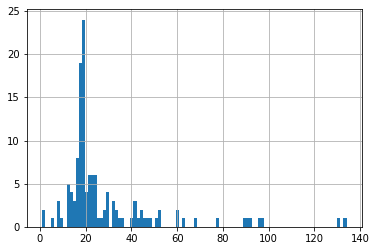

In [1042]:
dandok_df['세대가구호_수'].hist(bins=100)

In [1043]:
bdinfo_df.loc[max_df.index, '세대가구호_수'] = 19
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         80.485349
std          71.029387
min           2.640000
25%          48.873611
50%          64.580000
75%          87.371917
max        2315.601848
Name: 집당연면적, dtype: float64

In [1044]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
38927,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,203동,54083.4,8917.99,16.49,213035.37,9240.36,307.15,철근콘크리트구조,공동주택,철근콘크리트,23,1,33,213035.37,19901210.0,19901200.0,19961206.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20191114,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,92.0,1391.0,0.0,0,0,0,1,2315.601848,0.25,0.358696,15.119565,0.0


In [1045]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
38915,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,209동,54083.4,8917.99,16.49,213035.37,10837.60,307.15,철근콘크리트구조,공동주택,철근콘크리트,27,1,33,213035.37,19901210.0,19901200.0,19961212.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,108.0,1391.0,0.0,0,0,0,0,1972.549722,0.250000,0.305556,12.879630,0.0
38916,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,215동,54083.4,8917.99,16.49,213035.37,9641.02,307.15,철근콘크리트구조,공동주택,철근콘크리트,24,1,33,213035.37,19901210.0,19901200.0,19961212.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,96.0,1391.0,0.0,0,0,0,0,2219.118437,0.250000,0.343750,14.489583,0.0
38917,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,214동,0.0,8917.99,0.00,213035.37,11233.39,0.00,철근콘크리트구조,공동주택,철근콘크리트,27,1,33,213035.37,19901210.0,19901200.0,19961206.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,108.0,1391.0,0.0,0,0,0,0,1972.549722,0.250000,0.305556,12.879630,0.0
38918,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,206동,54083.4,8917.99,16.49,213035.37,12057.57,307.15,철근콘크리트구조,공동주택,철근콘크리트,20,1,33,213035.37,19901210.0,19901200.0,19961212.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,120.0,1391.0,0.0,0,0,0,0,1775.294750,0.166667,0.275000,11.591667,0.0
38919,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,212동,54083.4,8917.99,16.49,213035.37,9641.02,307.15,철근콘크리트구조,공동주택,철근콘크리트,24,1,33,213035.37,19901210.0,19901200.0,19961231.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,96.0,1391.0,0.0,0,0,0,0,2219.118437,0.250000,0.343750,14.489583,0.0
38920,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,208동,54083.4,8917.99,16.49,213035.37,13860.54,307.15,철근콘크리트구조,공동주택,철근콘크리트,23,1,33,213035.37,19901210.0,19901200.0,19961206.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,138.0,1391.0,0.0,0,0,0,0,1543.734565,0.166667,0.239130,10.079710,0.0
38921,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,213동,54083.4,8917.99,0.00,213035.37,9641.02,0.00,철근콘크리트구조,공동주택,철근콘크리트,24,1,33,213035.37,19901210.0,19901200.0,19961231.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,96.0,1391.0,0.0,0,0,0,0,2219.118437,0.250000,0.343750,14.489583,0.0
38922,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,205동,54083.4,8917.99,16.49,213035.37,11233.39,307.15,철근콘크리트구조,공동주택,철근콘크리트,27,1,33,213035.37,19901210.0,19901200.0,19961206.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,108.0,1391.0,0.0,0,0,0,0,1972.549722,0.250000,0.305556,12.879630,0.0
38923,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,204동,54083.4,8917.99,16.49,213035.37,11233.39,307.15,철근콘크리트구조,공동주택,철근콘크리트,27,1,33,213035.37,19901210.0,19901200.0,19961206.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,108.0,1391.0,0.0,0,0,0,1,1972.549722,0.250000,0.305556,12.879630,0.0
38924,집합

In [1047]:
addr_df.shape

(15, 63)

In [1048]:
no_df = addr_df[addr_df['연면적(㎡)'] != 213035.37]
print(no_df.shape)
no_df

(2, 63)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
38924,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,202동,54083.4,8917.99,16.49,10034.68,9641.02,307.15,철근콘크리트구조,공동주택,철근콘크리트,24,1,33,10034.68,19901210.0,19901200.0,19961212.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190713,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,96.0,1391.0,0.0,0,0,0,0,104.527917,0.25,0.34375,14.489583,0.0
38926,집합,표제부,서울특별시 광진구 구의동 611번지,611,0,2,201동,54083.4,8917.99,16.49,8432.04,8038.38,307.15,철근콘크리트구조,공동주택,철근콘크리트,20,1,33,8432.04,19901210.0,19901200.0,19961212.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20191004,서울특별시 광진구 구의동 611-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,80.0,1391.0,0.0,0,0,0,0,105.400500,0.25,0.41250,17.387500,0.0


In [1049]:
(10034.68+8432.04)/(9641.02+8432.04)

1.021781590942541

In [1050]:
addr_df = addr_df.drop(no_df.index)

In [1051]:
bdinfo_df.loc[addr_df.index, '연면적(㎡)'] = bdinfo_df.loc[addr_df.index, '용적_률_산정_연면적(㎡)'] * ((10034.68+8432.04)/(9641.02+8432.04))
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         80.311537
std          68.609311
min           2.640000
25%          48.873611
50%          64.580000
75%          87.371917
max        2254.650556
Name: 집당연면적, dtype: float64

In [1052]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
137147,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,517,80334.55,293.11,24.35,40583.71,3290.75,24.35,철근콘크리트구조,공동주택,철근콘크리트,9,1,3,2312.85,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,18.0,1965.0,0.0,0,0,0,1,2254.650556,0.5,0.166667,109.166667,0.0
137163,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,524,80334.55,293.11,24.35,40583.71,3290.75,198.63,철근콘크리트구조,공동주택,철근콘크리트,9,1,1,2312.85,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,18.0,1965.0,0.0,0,0,0,1,2254.650556,0.5,0.055556,109.166667,0.0


In [1053]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
137137,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,512,80334.55,1051.10,22.35,49194.61,11299.10,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,3,10923.75,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,72.0,1965.0,0.0,0,0,0,1,683.258472,0.166667,0.041667,27.291667,0.0
137138,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,510,80334.55,457.32,22.35,40555.06,3489.80,198.63,철근콘크리트구조,공동주택,철근콘크리트,5,1,0,2284.20,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,20.0,1965.0,0.0,0,0,0,1,2027.753000,0.250000,0.000000,98.250000,0.0
137139,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,511,80334.55,58610.00,22.35,43582.97,6062.31,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,2,5312110.00,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,42.0,1965.0,0.0,0,0,0,1,1037.689762,0.285714,0.047619,46.785714,0.0
137140,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,513,80334.55,700.70,22.35,7282.26,6728.76,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,2,7282.26,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,48.0,1965.0,0.0,0,0,0,0,151.713750,0.250000,0.041667,40.937500,0.0
137141,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,523,80334.55,700.94,24.35,40583.65,3290.69,198.63,철근콘크리트구조,공동주택,철근콘크리트,9,1,2,2312.79,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,18.0,1965.0,0.0,0,0,0,1,2254.647222,0.500000,0.111111,109.166667,0.0
137142,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,522,80334.55,700.94,24.35,7282.50,0.00,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,2,7282.50,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,48.0,1965.0,0.0,0,0,0,0,151.718750,0.250000,0.041667,40.937500,0.0
137143,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,525,80334.55,879.15,24.35,46583.96,8835.60,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,3,8313.10,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,66.0,1965.0,0.0,0,0,0,1,705.817576,0.181818,0.045455,29.772727,0.0
137144,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,507,80334.55,293.09,22.35,41273.47,3980.51,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,1,3002.61,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,24.0,1965.0,0.0,0,0,0,1,1719.727917,0.500000,0.041667,81.875000,0.0
137145,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,519,80334.55,700.70,24.35,45553.12,7934.36,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,2,7282.26,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 중랑구 묵동 20-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,48.0,1965.0,0.0,0,0,0,1,949.023333,0.250000,0.041667,40.937500,0.0
137146,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,505,80334.55,993.81,22.35,48555.79,10709.33,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,3,10284.93,19940207.0,1994022

In [1066]:
bdinfo_df.loc[137139, '총_동_연면적(㎡)'] = 5312.11

In [1070]:
addr_df.index.drop(137142)

49

In [1071]:
bdinfo_df.loc[addr_df.index.drop(137142), '연면적(㎡)'] = bdinfo_df.loc[addr_df.index.drop(137142), '용적_률_산정_연면적(㎡)']

In [1072]:
bdinfo_df.loc[137154, '연면적(㎡)'] = 9595.29

In [1073]:
bdinfo_df.loc[137165, '연면적(㎡)'] = 2284.20

In [1074]:
bdinfo_df.loc[137166, '연면적(㎡)'] = 5312.11

In [1075]:
bdinfo_df.loc[137166, '총_동_연면적(㎡)'] = 5312.11

In [1076]:
bdinfo_df.loc[137166, '연면적(㎡)'] = 3002.61

In [1077]:
bdinfo_df.loc[137168, '연면적(㎡)'] = 10285.17

In [1078]:
bdinfo_df.loc[137169, '연면적(㎡)'] = 7282.26

In [1079]:
bdinfo_df.loc[137170, '연면적(㎡)'] = 2312.85

In [1080]:
bdinfo_df.loc[137171, '연면적(㎡)'] = 8313.10

In [1081]:
bdinfo_df.loc[137172, '연면적(㎡)'] = 3002.61

In [1082]:
bdinfo_df.loc[137173, '연면적(㎡)'] = 7282.26
bdinfo_df.loc[137174, '연면적(㎡)'] = 10923.39
bdinfo_df.loc[137175, '연면적(㎡)'] = 10284.93
bdinfo_df.loc[137176, '연면적(㎡)'] = 2284.20
bdinfo_df.loc[137177, '연면적(㎡)'] = 5312.28
bdinfo_df.loc[137178, '연면적(㎡)'] = 10285.17
bdinfo_df.loc[137179, '연면적(㎡)'] = 2312.79
bdinfo_df.loc[137180, '연면적(㎡)'] = 2284.20
bdinfo_df.loc[137181, '연면적(㎡)'] = 10284.93
bdinfo_df.loc[137182, '연면적(㎡)'] = 10284.93
bdinfo_df.loc[137183, '연면적(㎡)'] = 7282.50
bdinfo_df.loc[137184, '연면적(㎡)'] = 2284.20
bdinfo_df.loc[137185, '연면적(㎡)'] = 7282.50
bdinfo_df.loc[137186, '연면적(㎡)'] = 5312.28

In [1083]:
bdinfo_df.loc[addr_df.index, '용적_률_산정_연면적(㎡)'] = bdinfo_df.loc[addr_df.index, '총_동_연면적(㎡)']

In [1084]:
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139566.000000
mean         80.102481
std          66.049581
min           0.000000
25%          48.872197
50%          64.580000
75%          87.370937
max        2232.050000
Name: 집당연면적, dtype: float64

In [1085]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
666,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,관리,0.0,414.72,0.0,2232.05,414.72,0.0,철근콘크리트구조,공동주택,철근콘크리트,1,1,0,2232.05,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2232.05,1.0,0.0,0.0,0.0


In [1086]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
665,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,502,0.0,997.58,0.0,14720.77,13895.92,0.0,철근콘크리트구조,공동주택,철근콘크리트,14,1,0,14720.77,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20131015,서울특별시 강남구 개포동 187-0,2013,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,140.0,0.0,0.0,0,0,0,0,105.148357,0.100000,0.0,0.0,0.0
666,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,관리,0.0,414.72,0.0,2232.05,414.72,0.0,철근콘크리트구조,공동주택,철근콘크리트,1,1,0,2232.05,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2232.050000,1.000000,0.0,0.0,0.0
667,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,505,0.0,1144.20,0.0,19496.40,15948.60,0.0,철근콘크리트구조,공동주택,철근콘크리트,14,1,0,19496.40,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,224.0,0.0,0.0,0,0,0,0,87.037500,0.062500,0.0,0.0,0.0
668,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,504,0.0,997.58,0.0,14720.77,13895.92,0.0,철근콘크리트구조,공동주택,철근콘크리트,14,1,0,14720.77,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,140.0,0.0,0.0,0,0,0,0,105.148357,0.100000,0.0,0.0,0.0
669,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,501,0.0,997.58,0.0,14720.77,13895.92,0.0,철근콘크리트구조,공동주택,철근콘크리트,14,1,0,14720.77,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,140.0,0.0,0.0,0,0,0,0,105.148357,0.100000,0.0,0.0,0.0
670,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,503,0.0,997.58,0.0,14720.77,13895.92,0.0,철근콘크리트구조,공동주택,철근콘크리트,14,1,0,14720.77,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,140.0,0.0,0.0,0,0,0,0,105.148357,0.100000,0.0,0.0,0.0
671,집합,표제부,서울특별시 강남구 개포동 187번지,187,0,0,506,0.0,875.40,0.0,12044.40,11315.40,0.0,철근콘크리트구조,공동주택,철근콘크리트,13,1,0,12044.40,19820522.0,NaN,19831026.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,156.0,0.0,0.0,0,0,0,0,77.207692,0.083333,0.0,0.0,0.0
672,일반,일반건축물,서울특별시 강남구 개포동 187번지,187,0,0,NaN,0.0,36.36,0.0,36.36,36.36,0.0,일반목구조,단독주택,기타지붕,1,0,0,36.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 개포동 187-0,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,목조,둘째기타구조없음,셋째기타구조없음,1개,초가지붕,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,36.360000,1.000000,0.0,0.0,0.0
673,일반,일반건축물,서울특별시 강남구 개포동 187번지,187,0,0,NaN,0.0,13.22,0.0,13.22,13.22,0.0,일반목구조,단독주택,기타지붕,1,0,0,13.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190522,서울특별시 강남구 개포동 187-0,2019,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,목조,둘째기타구조없음,셋째기타구조없음,1개,초가지붕,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,13.220000,1.000000,0.0,0.0,0.0
674,일반,일반건축물,서울특별시 강남구 개포동 187번지,187,0,0,NaN,0.0,42.98,0.0,42.98,42.98,0.0,일반목구조,단독주택,기타지붕,1,0,0,42.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190522,서울특별시 강남구 개포동 187-0,2019,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,목조,둘째기타구조없음,셋째기타구조없음,1개,초가지붕,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,42.980000,1.000000,0.0,0.0,0.0


In [1087]:
bdinfo_df.drop(666, inplace=True)

In [1088]:
bdinfo_df['집당연면적'].describe()

count    139565.000000
mean         80.087062
std          65.798154
min           0.000000
25%          48.871818
50%          64.580000
75%          87.370000
max        2037.493436
Name: 집당연면적, dtype: float64

In [1089]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
3017,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,201동,0.0,510.1807,0.0,179299.4224,9871.0542,0.0,철근콘크리트구조,공동주택,철근콘크리트,23,0,0,9836.2242,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,88.0,0.0,0.0,0,0,1,1,2037.493436,0.261364,0.0,0.0,0.0


In [1090]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
2992,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,103동,0.0,732.9958,0.0,13824.3252,13824.3252,0.0,철근콘크리트구조,공동주택,철근콘크리트,23,0,0,13824.3252,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 도곡동 527-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,159.0,0.0,0.0,0,0,1,0,86.945442,0.144654,0.0,0.0,0.0
2993,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,210동,0.0,384.3319,0.0,7038.6972,7038.6972,0.0,철근콘크리트구조,공동주택,철근콘크리트,22,0,0,7028.1560,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 도곡동 527-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,64.0,0.0,0.0,0,0,1,1,109.979644,0.343750,0.0,0.0,0.0
2994,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,211동,0.0,511.2528,0.0,8453.5582,8453.5582,0.0,철근콘크리트구조,공동주택,철근콘크리트,20,0,0,8443.0170,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,76.0,0.0,0.0,0,0,1,1,111.231029,0.263158,0.0,0.0,0.0
2995,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,404동,0.0,642.7728,0.0,14071.8056,14071.8056,0.0,철근콘크리트구조,공동주택,철근콘크리트,25,0,0,14071.8056,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,98.0,0.0,0.0,0,0,1,0,143.589853,0.255102,0.0,0.0,0.0
2996,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,208동,0.0,511.2528,0.0,8863.4212,8863.4212,0.0,철근콘크리트구조,공동주택,철근콘크리트,20,0,0,8852.8800,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,80.0,0.0,0.0,0,0,1,1,110.792765,0.250000,0.0,0.0,0.0
2997,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,407동,0.0,642.7728,0.0,14071.8056,14071.8056,0.0,철근콘크리트구조,공동주택,철근콘크리트,25,0,0,14071.8056,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,98.0,0.0,0.0,0,0,1,0,143.589853,0.255102,0.0,0.0,0.0
2998,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,408동,0.0,642.7728,0.0,12624.1548,12624.1548,0.0,철근콘크리트구조,공동주택,철근콘크리트,22,0,0,12624.1548,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,88.0,0.0,0.0,0,0,1,0,143.456305,0.250000,0.0,0.0,0.0
2999,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,102동,0.0,732.9958,0.0,13963.6008,13963.6008,0.0,철근콘크리트구조,공동주택,철근콘크리트,23,0,0,13963.6008,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,161.0,0.0,0.0,0,0,1,0,86.730440,0.142857,0.0,0.0,0.0
3000,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,411동,0.0,653.3952,0.0,12168.7430,12168.7430,0.0,철근콘크리트구조,공동주택,철근콘크리트,23,0,0,12168.7430,20020114.0,20020709.0,20060127.0,2002.0,주택과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 도곡동 527-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,85.0,0.0,0.0,0,0,1,0,143.161682,0.270588,0.0,0.0,0.0
3001,집합,표제부,서울특별시 강남구 도곡동 527번지,527,0,4,302동,0.0,748.4128,0.0,12364.9188,12364.9188,0.0,철근콘크리트구조,공동주택,철근콘크리트,

In [1092]:
bdinfo_df.loc[3017, '연면적(㎡)'] = 9871.0542
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139565.000000
mean         80.073267
std          65.589262
min           0.000000
25%          48.871818
50%          64.580000
75%          87.370000
max        2034.000000
Name: 집당연면적, dtype: float64

In [1094]:
bdinfo_df.to_csv('bdinfo_checkpoint2.csv', index=False)

In [1095]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
6265,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,908,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121019,서울특별시 강남구 일원동 688-0,2012,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6266,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,915,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121019,서울특별시 강남구 일원동 688-0,2012,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6271,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,916,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6276,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,914,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6279,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,903,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6280,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,913,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6282,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,917,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6283,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,920,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6284,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,904,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,주택unknown,주택unknown,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0


In [1097]:
max_df.shape

(9, 63)

In [1096]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
addr_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
6265,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,908,0.0,406.80,0.0,2034.00,2034.00,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.00,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121019,서울특별시 강남구 일원동 688-0,2012,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.00,5.0,0.0,0.0,0.0
6266,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,915,0.0,406.80,0.0,2034.00,2034.00,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.00,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121019,서울특별시 강남구 일원동 688-0,2012,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.00,5.0,0.0,0.0,0.0
6267,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,909,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0
6268,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,902,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0
6269,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,901,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0
6270,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,912,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0
6271,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,916,0.0,406.80,0.0,2034.00,2034.00,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.00,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,2034.00,5.0,0.0,0.0,0.0
6272,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,905,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0
6273,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,907,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0
6274,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,919,0.0,305.10,0.0,1525.50,1525.50,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.50,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,1525.50,5.0,0.0,0.0,0.0


In [1099]:
bdinfo_df.shape

(139565, 63)

In [1102]:
bdinfo_df.loc[addr_df.index.drop(6285), '세대가구호_수'] = 690 * (bdinfo_df.loc[addr_df.index.drop(6285), '건축_면적(㎡)'] / bdinfo_df.loc[addr_df.index.drop(6285), '건축_면적(㎡)'].sum())

In [1103]:
bdinfo_df.loc[addr_df.index.drop(6285),:]

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
6265,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,908,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121019,서울특별시 강남구 일원동 688-0,2012,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,40.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6266,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,915,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121019,서울특별시 강남구 일원동 688-0,2012,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,40.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6267,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,909,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0
6268,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,902,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0
6269,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,901,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0
6270,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,912,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0
6271,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,916,0.0,406.8,0.0,2034.0,2034.0,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,2034.0,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,40.0,0.0,0.0,0,0,0,0,2034.0,5.0,0.0,0.0,0.0
6272,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,905,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0
6273,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,907,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0
6274,집합,표제부,서울특별시 강남구 일원동 688번지,688,0,0,919,0.0,305.1,0.0,1525.5,1525.5,0.0,철근콘크리트구조,공동주택,철근콘크리트,5,0,0,1525.5,19821015.0,NaN,19831110.0,1982.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 일원동 688-0,2017,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,30.0,0.0,0.0,0,0,0,0,1525.5,5.0,0.0,0.0,0.0


In [1105]:
bdinfo_df = bdinfo_df[bdinfo_df['동_명'] != '관리']
bdinfo_df.shape

(139564, 63)

In [1106]:
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139564.000000
mean         79.828978
std          62.379245
min           0.000000
25%          48.871721
50%          64.565000
75%          87.345875
max        1984.636111
Name: 집당연면적, dtype: float64

In [1107]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
1913,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제101동,0.0,893.56,0.0,35723.45,3362.16,0.0,철근콘크리트구조,공동주택,기타지붕,10,1,1,2418.64,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,18.0,0.0,0.0,0,0,0,1,1984.636111,0.555556,0.055556,0.0,0.0


In [1109]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
print(addr_df.shape)
addr_df

(15, 63)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
1907,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제103동,0.0,887.34,0.0,16610.64,15929.76,0.0,철근콘크리트구조,공동주택,기타지붕,24,1,0,16610.64,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,140.0,0.0,0.0,0,0,1,0,118.647429,0.171429,0.000000,0.0,0.0
1908,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제112동,0.0,709.73,0.0,12924.60,11856.60,0.0,철근콘크리트구조,공동주택,기타지붕,22,2,0,12924.60,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,150.0,0.0,0.0,0,0,1,0,86.164000,0.146667,0.000000,0.0,0.0
1909,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제111동,0.0,247.89,0.0,2917.91,2706.14,0.0,철근콘크리트구조,공동주택,기타지붕,12,1,1,2917.58,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,33.0,0.0,0.0,0,0,0,0,88.421515,0.363636,0.030303,0.0,0.0
1910,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제106동,0.0,276.75,0.0,5489.39,5280.46,0.0,철근콘크리트구조,공동주택,기타지붕,22,1,1,5489.39,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,66.0,0.0,0.0,0,0,0,0,83.172576,0.333333,0.015152,0.0,0.0
1911,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제114동,0.0,465.93,0.0,6442.64,5730.40,0.0,철근콘크리트구조,공동주택,기타지붕,16,2,1,6442.64,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,48.0,0.0,0.0,0,0,0,0,134.221667,0.333333,0.020833,0.0,0.0
1912,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제109동,0.0,591.56,0.0,9141.18,8687.26,0.0,철근콘크리트구조,공동주택,기타지붕,21,1,0,9141.18,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,76.0,0.0,0.0,0,0,1,0,120.278684,0.276316,0.000000,0.0,0.0
1913,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제101동,0.0,893.56,0.0,35723.45,3362.16,0.0,철근콘크리트구조,공동주택,기타지붕,10,1,1,2418.64,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,18.0,0.0,0.0,0,0,0,1,1984.636111,0.555556,0.055556,0.0,0.0
1914,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제107동,0.0,496.92,0.0,10418.60,10024.84,0.0,철근콘크리트구조,공동주택,기타지붕,25,1,0,10418.60,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,100.0,0.0,0.0,0,0,1,0,104.186000,0.250000,0.000000,0.0,0.0
1915,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제110동,0.0,495.68,0.0,5442.38,5057.58,0.0,철근콘크리트구조,공동주택,기타지붕,14,1,2,5442.38,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 1014-3,2019,주거용,주거용,공동주택,공동주택,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,박공지붕,둘째지붕없음,셋째지붕없음,51.0,0.0,0.0,0,0,0,0,106.713333,0.274510,0.039216,0.0,0.0
1916,집합,표제부,서울특별시 강남구 대치동 1014-3번지,1014,3,11,제105동,0.0,247.84,0.0,2094.98,1902.58,0.0,철근콘크리트구조,공동주택,기타지붕,11,1,1,2094.98,19970315.0,19970425.0,20000731.0,1997.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,2019053

In [1110]:
bdinfo_df.loc[max_df.index, '연면적(㎡)'] = 3572.345
bdinfo_df['집당연면적'] = bdinfo_df['연면적(㎡)'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당지상층수'] = bdinfo_df['지상_층_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당승강기수'] = bdinfo_df['승용_승강기_수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차대수'] = bdinfo_df['총주차대수'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당주차면적'] = bdinfo_df['총주차장면적'] / bdinfo_df['세대가구호_수']
bdinfo_df['집당연면적'].describe()

count    139564.000000
mean         79.816180
std          62.171323
min           0.000000
25%          48.871721
50%          64.565000
75%          87.345875
max        1801.700000
Name: 집당연면적, dtype: float64

In [1111]:
max_df = bdinfo_df[bdinfo_df['집당연면적'] == bdinfo_df['집당연면적'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
24042,일반,일반건축물,서울특별시 강서구 염창동 252번지,252,0,0,NaN,839.6,337.0,40.14,1801.7,0.0,147.85,철근콘크리트구조,제2종근린생활시설,철근콘크리트,4,1,0,1801.7,19900221.0,199003.0,19901129.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 강서구 염창동 252-0,2017,비주거용,주거용,주택unknown,근린unknown,주택unknown,셋째용도없음,2개,2개,철근콘크리트조,연와조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,10.0,0.0,0,0,0,0,1801.7,4.0,0.0,10.0,0.0


In [1112]:
addr_df = bdinfo_df[bdinfo_df['주소'] == max_df['주소'].iloc[0]]
print(addr_df.shape)
addr_df

(3, 63)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
24042,일반,일반건축물,서울특별시 강서구 염창동 252번지,252,0,0,NaN,839.6,337.00,40.14,1801.70,0.00,147.85,철근콘크리트구조,제2종근린생활시설,철근콘크리트,4,1,0,1801.70,19900221.0,199003.0,19901129.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 강서구 염창동 252-0,2017,비주거용,주거용,주택unknown,근린unknown,주택unknown,셋째용도없음,2개,2개,철근콘크리트조,연와조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,10.0,0.0,0,0,0,0,1801.700000,4.000000,0.00000,10.0,0.0
24043,집합,표제부,서울특별시 강서구 염창동 252번지,252,0,0,102,839.6,160.75,0.00,1237.30,1237.30,0.00,철근콘크리트구조,업무시설,철근콘크리트,11,0,1,1237.30,20180727.0,20171201.0,20190123.0,2018.0,건축과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190125,서울특별시 강서구 염창동 252-0,2019,비주거용,주거용,도시형다세대,도시형다세대,근린unknown,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,40.0,0.0,0.0,0,0,0,0,30.932500,0.275000,0.02500,0.0,0.0
24044,집합,표제부,서울특별시 강서구 염창동 252번지,252,0,0,101,839.6,160.75,0.00,1388.58,1269.64,0.00,철근콘크리트구조,업무시설,철근콘크리트,11,1,1,1388.58,NaN,20171201.0,20190123.0,2018.0,건축과,주택건설사업계획승인,NaN,0.0,0,NaN,0,NaN,0,20190125,서울특별시 강서구 염창동 252-0,2019,비주거용,주거용,도시형다세대,도시형다세대,근린unknown,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,41.0,0.0,0.0,0,0,0,0,33.867805,0.268293,0.02439,0.0,0.0


In [1113]:
bdinfo_df['세대가구호_수'].describe()

count    139564.000000
mean         22.180634
std          44.916243
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1454.000000
Name: 세대가구호_수, dtype: float64

In [1114]:
one_df = bdinfo_df[bdinfo_df['세대가구호_수'] == 1]
one_df.shape

(7184, 63)

In [1115]:
one_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
21,일반,일반건축물,서울특별시 강남구 개포동 1165-2번지,1165,2,0,NaN,0.0,136.26,0.00,744.84,669.24,0.00,철근콘크리트구조,제2종근린생활시설,철근콘크리트,5,1,0,744.84,19900326.0,NaN,19910115.0,1990.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20120517,서울특별시 강남구 개포동 1165-2,2012,비주거용,주거용,단독주택,근린unknown,단독주택,셋째용도없음,2개,2개,철근콘크리트조,연와조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,744.84,5.0,0.0,0.0,0.0
28,일반,일반건축물,서울특별시 강남구 개포동 1166-7번지,1166,7,0,NaN,249.5,116.28,46.61,311.65,196.18,78.63,벽돌구조,단독주택,철근콘크리트,2,1,0,311.65,19880530.0,19880607.0,19880910.0,1988.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20111117,서울특별시 강남구 개포동 1166-7,2011,주거용,주거용,단독주택,단독주택,둘째용도없음,셋째용도없음,1개,1개,연와조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,2.0,27.5,0,0,0,0,311.65,2.0,0.0,2.0,27.5
45,일반,일반건축물,서울특별시 강남구 개포동 1171-2번지,1171,2,0,NaN,0.0,86.31,0.00,246.87,160.56,0.00,벽돌구조,단독주택,철근콘크리트,2,1,0,246.87,19890221.0,NaN,19890421.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20121031,서울특별시 강남구 개포동 1171-2,2012,주거용,주거용,단독주택,단독주택,둘째용도없음,셋째용도없음,1개,1개,연와조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,246.87,2.0,0.0,0.0,0.0
51,일반,일반건축물,서울특별시 강남구 개포동 1171-9번지,1171,9,0,NaN,175.9,87.65,49.83,249.42,162.69,92.49,벽돌구조,단독주택,철근콘크리트,2,1,0,249.42,19890308.0,19890313.0,19890616.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20111123,서울특별시 강남구 개포동 1171-9,2011,주거용,주거용,단독주택,단독주택,둘째용도없음,셋째용도없음,1개,1개,연와조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,249.42,2.0,0.0,0.0,0.0
62,일반,일반건축물,서울특별시 강남구 개포동 1174번지,1174,0,0,NaN,117.3,58.41,49.80,204.48,175.23,149.39,철근콘크리트구조,단독주택,철근콘크리트,3,1,0,204.48,19890415.0,19890425.0,19891007.0,1989.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20111117,서울특별시 강남구 개포동 1174-0,2011,주거용,주거용,단독주택,단독주택,근린unknown,셋째용도없음,2개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,1.0,0.0,0.0,0,0,0,0,204.48,3.0,0.0,0.0,0.0


In [1116]:
one_df['주소'].nunique()

6699

In [1117]:
bdinfo_df.to_csv('bdinfo_checkpoint3.csv', index=False)

In [1118]:
bdinfo_df2 = bdinfo_df.drop(one_df.index)

In [1119]:
bdinfo_df2.shape

(132380, 63)

In [1120]:
bdinfo_df2['세대가구호_수'].describe()

count    132380.000000
mean         23.330065
std          45.839794
min           2.000000
25%           7.000000
50%           9.000000
75%          16.000000
max        1454.000000
Name: 세대가구호_수, dtype: float64

In [1121]:
bdinfo_df2['집당연면적'] = bdinfo_df2['연면적(㎡)'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당지상층수'] = bdinfo_df2['지상_층_수'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당승강기수'] = bdinfo_df2['승용_승강기_수'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당주차대수'] = bdinfo_df2['총주차대수'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당주차면적'] = bdinfo_df2['총주차장면적'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당연면적'].describe()

count    132380.000000
mean         73.094148
std          43.993638
min           0.000000
25%          48.172933
50%          63.030000
75%          82.480312
max        1739.345000
Name: 집당연면적, dtype: float64

In [1122]:
min_df = bdinfo_df2[bdinfo_df2['집당연면적'] == bdinfo_df2['집당연면적'].min()]
min_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
137167,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,502,80334.55,293.09,22.35,0.0,3002.61,198.63,철근콘크리트구조,공동주택,철근콘크리트,12,1,1,3002.61,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20200828,서울특별시 중랑구 묵동 20-0,2020,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,2개,철근콘크리트조,벽식조,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,24.0,1965.0,0.0,0,0,0,1,0.0,0.5,0.041667,81.875,0.0


In [1123]:
bdinfo_df2.loc[137167, '연면적(㎡)'] = 3002.61

In [1126]:
bdinfo_df2['집당연면적'].describe()

count    132380.000000
mean         73.094148
std          43.993638
min           0.000000
25%          48.172933
50%          63.030000
75%          82.480312
max        1739.345000
Name: 집당연면적, dtype: float64

In [1127]:
bdinfo_df2['집당연면적'] = bdinfo_df2['연면적(㎡)'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당지상층수'] = bdinfo_df2['지상_층_수'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당승강기수'] = bdinfo_df2['승용_승강기_수'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당주차대수'] = bdinfo_df2['총주차대수'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당주차면적'] = bdinfo_df2['총주차장면적'] / bdinfo_df2['세대가구호_수']
bdinfo_df2['집당연면적'].describe()

count    132380.000000
mean         73.095093
std          43.993411
min           3.031515
25%          48.173894
50%          63.030000
75%          82.481250
max        1739.345000
Name: 집당연면적, dtype: float64

In [1128]:
min_df = bdinfo_df2[bdinfo_df2['집당연면적'] == bdinfo_df2['집당연면적'].min()]
min_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
102241,집합,표제부,서울특별시 송파구 오금동 11번지,11,0,1,상가1동,12935.6,427.5,25.03,2461.59,0.0,264.42,철근콘크리트구조,공동주택,철근콘크리트,3,2,1,2461.59,19930702.0,19940310.0,19971010.0,1993.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 송파구 오금동 11-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,2개,슬라브,기와지붕,셋째지붕없음,812.0,24.0,0.0,0,0,0,0,3.031515,0.003695,0.001232,0.029557,0.0


In [1129]:
addr_df = bdinfo_df2[bdinfo_df2['주소'] == min_df['주소'].iloc[0]]
print(addr_df.shape)
addr_df.head()

(5, 63)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적
102241,집합,표제부,서울특별시 송파구 오금동 11번지,11,0,1,상가1동,12935.6,427.50,25.03,2461.59,0.0,264.42,철근콘크리트구조,공동주택,철근콘크리트,3,2,1,2461.59,19930702.0,19940310.0,19971010.0,1993.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 송파구 오금동 11-0,2017,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,2개,슬라브,기와지붕,셋째지붕없음,812.0,24.0,0.0000,0,0,0,0,3.031515,0.003695,0.001232,0.029557,0.000000
102242,집합,표제부,서울특별시 송파구 오금동 11번지,11,0,1,102동,12935.6,858.16,25.03,10038.65,0.0,264.42,철근콘크리트구조,공동주택,철근콘크리트,14,1,3,10038.65,19930702.0,19940310.0,19970124.0,1993.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 송파구 오금동 11-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,232.0,265.0,4275.1001,0,0,0,0,43.270043,0.060345,0.012931,1.142241,18.427156
102243,집합,표제부,서울특별시 송파구 오금동 11번지,11,0,1,101동,12935.6,1578.61,25.03,24177.49,0.0,264.42,철근콘크리트구조,공동주택,철근콘크리트,19,1,6,24177.49,19930702.0,19940310.0,19970124.0,1993.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 송파구 오금동 11-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,206.0,265.0,4275.1001,0,0,0,0,117.366456,0.092233,0.029126,1.286408,20.752913
102244,집합,표제부,서울특별시 송파구 오금동 11번지,11,0,1,상가1동,12935.6,427.50,25.03,2461.59,0.0,264.42,철근콘크리트구조,공동주택,철근콘크리트,3,2,1,2461.59,19930702.0,19940310.0,19971010.0,1993.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190613,서울특별시 송파구 오금동 11-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,2개,슬라브,기와지붕,셋째지붕없음,11.0,24.0,0.0000,0,0,0,0,223.780909,0.272727,0.090909,2.181818,0.000000
102245,집합,표제부,서울특별시 송파구 오금동 11번지,11,0,1,상가2동,0.0,198.72,25.03,596.16,0.0,264.42,철근콘크리트구조,공동주택,철근콘크리트,2,1,0,596.16,19930702.0,19940310.0,19971010.0,1993.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20191122,서울특별시 송파구 오금동 11-0,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,10.0,6.0,0.0000,0,0,0,0,59.616000,0.200000,0.000000,0.600000,0.000000


In [1130]:
bdinfo_df2.to_csv('bdinfo_checkpoint4.csv', index=False)

In [1131]:
bdinfo_df2['외필지_수'].value_counts()

0     107281
1      17795
2       3716
3       1731
4        803
5        358
6        251
7        172
8         78
9         45
10        37
11        32
12        21
27        15
25        13
17         9
13         8
16         5
14         3
20         3
26         1
18         1
21         1
23         1
Name: 외필지_수, dtype: int64

<AxesSubplot:>

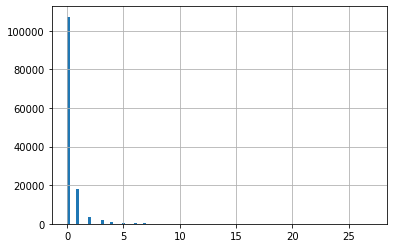

In [1156]:
bdinfo_df2['외필지_수'].hist(bins=100)

In [1134]:
from sklearn.preprocessing import power_transform

<AxesSubplot:>

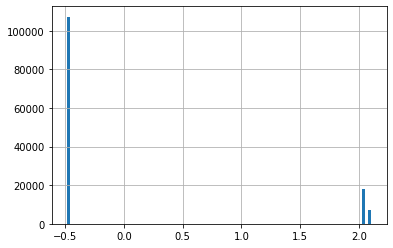

In [1150]:
pd.Series(power_transform(bdinfo_df2[['외필지_수']]).reshape(-1)).hist(bins=100)

<AxesSubplot:>

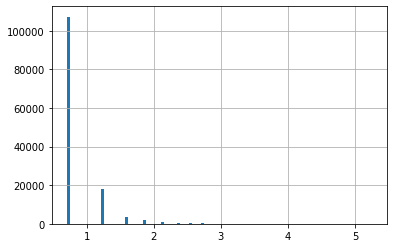

In [1157]:
bdinfo_df2['외필지_수'].apply(lambda x: np.sqrt(x+0.5)).hist(bins=100)

In [1159]:
bdinfo_df['외필지있음'] = bdinfo_df['외필지_수'].apply(lambda x: 1 if x > 0 else 0)
bdinfo_df['외필지있음'].value_counts()

0    114265
1     25299
Name: 외필지있음, dtype: int64

In [1160]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적,외필지있음
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,55.1375,0.350000,0.050000,0.450000,6.900000,0
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,55.1375,0.350000,0.050000,0.450000,6.900000,0
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,75.2600,0.454545,0.090909,0.727273,10.979091,0
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,75.2600,0.454545,0.090909,0.727273,10.979091,0
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,1360.02,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,113.3350,0.583333,0.000000,1.000000,33.690000,0


In [ ]:
simple_cols = ['']

In [ ]:
bdinfo_df['']

In [1167]:
bdinfo_df[['주소', '사용승인_일', '연면적(㎡)']].groupby(['주소', '사용승인_일']).transform('mean')['연면적(㎡)']

0         1102.75
1         1102.75
2          827.86
3          827.86
4         1360.02
           ...   
139719     655.30
139720     497.20
139721     520.99
139722     298.02
139723     452.27
Name: 연면적(㎡), Length: 139564, dtype: float64

In [1168]:
bdinfo_df['대지면적mean'] = bdinfo_df[['주소', '사용승인_일', '대지_면적(㎡)']].groupby(['주소', '사용승인_일']).transform('mean')['대지_면적(㎡)']
bdinfo_df['건축면적mean'] = bdinfo_df[['주소', '사용승인_일', '건축_면적(㎡)']].groupby(['주소', '사용승인_일']).transform('mean')['건축_면적(㎡)']
bdinfo_df['연면적mean'] = bdinfo_df[['주소', '사용승인_일', '연면적(㎡)']].groupby(['주소', '사용승인_일']).transform('mean')['연면적(㎡)']

In [1169]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적,외필지있음,대지면적mean,건축면적mean,연면적mean
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,55.1375,0.350000,0.050000,0.450000,6.900000,0,336.1,167.78,1102.75
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,55.1375,0.350000,0.050000,0.450000,6.900000,0,336.1,167.78,1102.75
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,75.2600,0.454545,0.090909,0.727273,10.979091,0,325.5,185.07,827.86
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,75.2600,0.454545,0.090909,0.727273,10.979091,0,325.5,185.07,827.86
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,1360.02,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,113.3350,0.583333,0.000000,1.000000,33.690000,0,330.3,166.01,1360.02


In [1173]:
simple_cols = ['주소', '사용승인_일', '대장_구분', '구조', '주_용도', '지붕', '지상_층_수', '지하_층_수', '승용_승강기_수',
               '기타용도_주택종류', '첫기타용도', '둘째기타용도', '셋째기타용도', '기타용도갯수', '첫째기타구조', '둘째기타구조',
               '셋째기타구조', '기타지붕종류수', '첫째기타지붕', '둘째기타지붕', '셋째기타지붕', '세대가구호_수', '총주차대수',
               '총주차장면적', '옥내기계식주차장있음', '옥외기계식주차장있음', '비상용승강기있음', '부속건물있음', '외필지있음'
              ]

In [1174]:
bdinfo_df.shape

(139564, 67)

In [1175]:
simple_df = bdinfo_df[simple_cols]
print(simple_df.shape)
simple_df.head()

(139564, 32)


,주소,사용승인_일,대장_구분,구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,외필지있음,대지면적mean,건축면적mean,연면적mean
0,서울특별시 강남구 개포동 1163-4,20130307.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0,336.1,167.78,1102.75
1,서울특별시 강남구 개포동 1163-4,20130307.0,집합,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0,336.1,167.78,1102.75
2,서울특별시 강남구 개포동 1164-0,20171107.0,집합,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,0,325.5,185.07,827.86
3,서울특별시 강남구 개포동 1164-0,20171107.0,집합,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,0,325.5,185.07,827.86
4,서울특별시 강남구 개포동 1164-12,20000923.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,0,330.3,166.01,1360.02


In [1178]:
nodupes_df = simple_df.drop_duplicates()
nodupes_df.shape

(128577, 32)

In [1179]:
nodupes_df.head()

,주소,사용승인_일,대장_구분,구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,외필지있음,대지면적mean,건축면적mean,연면적mean
0,서울특별시 강남구 개포동 1163-4,20130307.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0,336.1,167.78,1102.75
1,서울특별시 강남구 개포동 1163-4,20130307.0,집합,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0,336.1,167.78,1102.75
2,서울특별시 강남구 개포동 1164-0,20171107.0,집합,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,0,325.5,185.07,827.86
4,서울특별시 강남구 개포동 1164-12,20000923.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,0,330.3,166.01,1360.02
5,서울특별시 강남구 개포동 1164-13,20001229.0,집합,철근콘크리트구조,공동주택,철근콘크리트,8,1,1,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,14.0,15.0,0.00,0,0,0,0,0,330.7,165.78,1352.37


In [1180]:
nodupes_df = nodupes_df.drop_duplicates(subset=nodupes_df.columns.drop(['주_용도']))
nodupes_df.shape

(128491, 32)

In [1181]:
nodupes_df.head()

,주소,사용승인_일,대장_구분,구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,외필지있음,대지면적mean,건축면적mean,연면적mean
0,서울특별시 강남구 개포동 1163-4,20130307.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0,336.1,167.78,1102.75
2,서울특별시 강남구 개포동 1164-0,20171107.0,집합,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,0,325.5,185.07,827.86
4,서울특별시 강남구 개포동 1164-12,20000923.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,0,330.3,166.01,1360.02
5,서울특별시 강남구 개포동 1164-13,20001229.0,집합,철근콘크리트구조,공동주택,철근콘크리트,8,1,1,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,14.0,15.0,0.00,0,0,0,0,0,330.7,165.78,1352.37
6,서울특별시 강남구 개포동 1164-14,20000701.0,집합,철근콘크리트구조,공동주택,철근콘크리트,7,0,1,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,15.0,12.0,0.00,0,0,0,0,0,330.5,197.80,988.41


In [1182]:
nodupes_df['집당연면적'] = nodupes_df['연면적mean'] / nodupes_df['세대가구호_수']
nodupes_df['집당연면적'].describe()

count    128101.000000
mean         81.026416
std          86.497119
min           2.265739
25%          47.934545
50%          62.971667
75%          83.301667
max       11129.929444
Name: 집당연면적, dtype: float64

In [1183]:
nodupes_df.drop(columns=['대지면적mean', '건축면적mean', '연면적mean', '집당연면적', '세대가구호_수', '총주차대수', '총주차장면적'], inplace=True)

In [ ]:
nodupes_df.drop_duplicates(subset=)

In [1184]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,총_동_연면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,기타구조갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,집당연면적,집당지상층수,집당승강기수,집당주차대수,집당주차면적,외필지있음,대지면적mean,건축면적mean,연면적mean
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,55.1375,0.350000,0.050000,0.450000,6.900000,0,336.1,167.78,1102.75
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,1102.75,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,55.1375,0.350000,0.050000,0.450000,6.900000,0,336.1,167.78,1102.75
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,75.2600,0.454545,0.090909,0.727273,10.979091,0,325.5,185.07,827.86
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,827.86,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,75.2600,0.454545,0.090909,0.727273,10.979091,0,325.5,185.07,827.86
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,1360.02,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,113.3350,0.583333,0.000000,1.000000,33.690000,0,330.3,166.01,1360.02


In [1185]:
simple_cols = ['주소', '사용승인_일', '대장_구분', '연면적(㎡)',
               '구조', '주_용도', '지붕', '지상_층_수', '지하_층_수', '승용_승강기_수',
               '기타용도_주택종류', '첫기타용도', '둘째기타용도', '셋째기타용도', '기타용도갯수', '첫째기타구조', '둘째기타구조',
               '셋째기타구조', '기타지붕종류수', '첫째기타지붕', '둘째기타지붕', '셋째기타지붕', '세대가구호_수', '총주차대수',
               '총주차장면적', '옥내기계식주차장있음', '옥외기계식주차장있음', '비상용승강기있음', '부속건물있음', '외필지있음'
              ]

In [1186]:
simple_df = bdinfo_df[simple_cols]
print(simple_df.shape)
simple_df.head()

(139564, 30)


,주소,사용승인_일,대장_구분,연면적(㎡),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,기타용도_주택종류,첫기타용도,둘째기타용도,셋째기타용도,기타용도갯수,첫째기타구조,둘째기타구조,셋째기타구조,기타지붕종류수,첫째기타지붕,둘째기타지붕,셋째기타지붕,세대가구호_수,총주차대수,총주차장면적,옥내기계식주차장있음,옥외기계식주차장있음,비상용승강기있음,부속건물있음,외필지있음
0,서울특별시 강남구 개포동 1163-4,20130307.0,집합,1102.75,철근콘크리트구조,공동주택,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0
1,서울특별시 강남구 개포동 1163-4,20130307.0,집합,1102.75,철근콘크리트구조,종교시설,철근콘크리트,7,1,1,도시형unknown,도시형unknown,종교시설,셋째용도없음,2개,벽식조,일반철골조,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,20.0,9.0,138.00,0,0,0,0,0
2,서울특별시 강남구 개포동 1164-0,20171107.0,집합,827.86,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,0
3,서울특별시 강남구 개포동 1164-0,20171107.0,집합,827.86,철근콘크리트구조,공동주택,철근콘크리트,5,1,1,도시형다세대,도시형다세대,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,철근콘크리트,둘째지붕없음,셋째지붕없음,11.0,8.0,120.77,0,0,0,0,0
4,서울특별시 강남구 개포동 1164-12,20000923.0,집합,1360.02,철근콘크리트구조,공동주택,철근콘크리트,7,1,0,일반아파트,일반아파트,둘째용도없음,셋째용도없음,1개,철근콘크리트조,둘째기타구조없음,셋째기타구조없음,1개,슬라브,둘째지붕없음,셋째지붕없음,12.0,12.0,404.28,0,0,0,0,0


In [1187]:
simple_df.to_csv('simple_bdinfo_checkpoint1.csv', index=False)

In [ ]:
bdinfo_df['연면적mean'] = bdinfo_df[['주소', '사용승인_일', '연면적(㎡)']].groupby(['주소', '사용승인_일']).transform('mean')['연면적(㎡)']

In [1054]:
addr_df.shape

(50, 63)

In [1055]:
addr_df['대지_면적(㎡)'].value_counts()

80334.55    50
Name: 대지_면적(㎡), dtype: int64

In [1058]:
addr_df['용적_률(%)'].value_counts()

198.63    49
24.35      1
Name: 용적_률(%), dtype: int64

In [1056]:
addr_df['건축_면적(㎡)'].sum()

91098.61000000002

In [1062]:
addr_df['연면적(㎡)'].value_counts()

2284.20     4
40555.06    4
10284.93    3
43583.14    3
48555.79    3
7282.26     3
7282.50     3
41273.47    2
48556.03    2
5312.28     2
3002.61     2
40583.65    2
45553.36    2
40583.71    2
10285.17    2
49194.61    1
45553.12    1
10923.39    1
9595.29     1
8313.10     1
43582.97    1
46583.96    1
49194.25    1
2312.85     1
5312.11     1
2312.79     1
Name: 연면적(㎡), dtype: int64

In [1060]:
addr_df['연면적(㎡)'].sum()

1265501.9000000001

In [1059]:
80334.55 * 198.63 / 100

159568.516665

In [1063]:
addr_df['용적_률_산정_연면적(㎡)'].sum()

174845.74

In [1065]:
(bdinfo_df['용적_률_산정_연면적(㎡)'] == 0).sum()

5181

In [ ]:
cols_to_drop = ['대장_종류', '대지_위치', '번', '지', '동_명', '대지_면적(㎡)', '기타_구조', '기타_용도', '기타_지붕',
                '세대_수(세대)', '가구_수(가구)', '호_수(호)', '허가번호_기관', '허가번호_구분', '에너지효율_등급', '에너지절감_율',
                '에너지_EPI점수', '친환경_건축물_등급', '친환경_건축물_인증점수', '주용도_주거용여부', '기타용도_주거용여부',
                '지능형_건축물_등급', '지능형_건축물_인증점수'
               ]

In [ ]:
simple_df = bdinfo_df.drop(columns=cols_to_drop)
print(simple_df.shape)
simple_df.head()

In [ ]:
simple_df.isna().sum()

In [ ]:
no_roof_df = bdinfo_df[bdinfo_df['지붕'].isna()]
no_roof_df.shape

In [ ]:
no_roof_df

In [ ]:
bdinfo_df['지붕'].value_counts()

In [ ]:
simple_df['지붕'].fillna('(철근)콘크리트', inplace=True)

In [ ]:
simple_df.isna().sum()

In [ ]:
cat_cols = ['대장_구분', '구조', '주_용도', '지붕', '기타용도_주택종류']
for col in cat_cols:
    map_df = pd.DataFrame({'category':simple_df[col].unique(), 'map':[i for i in range(len(simple_df[col].unique()))]})
    map_df.to_csv('./feature_maps/{}_map.csv'.format(col), index=False)
    col_map = {}
    for i in range(map_df.shape[0]):
        col_map[map_df['category'][i]] = map_df['map'][i]
    
    simple_df[col+'_mapped'] = simple_df[col].map(col_map)

In [ ]:
simple_df.head()

In [ ]:
simple_df.drop(columns=cat_cols, inplace=True)

In [ ]:
simple_df.head()

In [ ]:
no_allowed_df = simple_df[simple_df['사용승인_일'].isna()]
no_allowed_df.shape

In [ ]:
no_allowed_df

In [ ]:
simple_df['사용승인_일'].fillna(2006, inplace=True)

In [ ]:
simple_df['사용승인_년'] = simple_df['사용승인_일'].apply(lambda x: str(x)[:4]).apply(int)
simple_df.head()

In [ ]:
simple_df.drop(columns=['허가_일', '착공_일', '사용승인_일', '허가번호_년', '생성_일자'], inplace=True)

In [ ]:
simple_df.head()

In [ ]:
simple_df.shape

In [ ]:
simple_df['주소'].nunique()

In [ ]:
simple_df.rename(columns={'주소':'지번주소'}, inplace=True)

In [ ]:
simple_df['생성년도'].unique().max()

In [ ]:
for i in range(2020, 2021):
    print(i)

In [ ]:
simple_df.isna().sum()

In [ ]:
pd.DataFrame({'col1':[1,2,3], 'col2':2, 'col3':})

In [ ]:
sorted(simple_df['생성년도'].unique().tolist())

In [ ]:
cols = simple_df.columns.tolist()
cols.remove('지번주소')
cols.remove('생성년도')
cols.remove('사용승인_년')
cols = ['지번주소', '생성년도', '사용승인_년'] + cols
simple_df = simple_df[cols]

In [ ]:
simple_df.head()

In [ ]:
simple_df['생성년도'].describe()

In [ ]:
simple_df.drop(columns=['건물나이'], inplace=True)

In [ ]:
simple_df['사용승인_년'].describe()

In [ ]:
prac_list = [1,2,3,4,5]

In [ ]:
prac_list[4]

In [ ]:
for i, v in enumerate(prac_list):
    if prac_list[i+1] == 2006:
        print(i)

In [ ]:
prac_list = [2000, 2001, 2004, 2005, 2006]

In [ ]:
for v in prac_list:
    if (v < 2006) & (max(prac_list) >= 2006):
        continue
    else:
        print(v)

In [ ]:
for i in range(0,0):
    print(i)

In [ ]:
def create_complete_bdinfo_df_iteratively(df):
    import numpy as np
    import pandas as pd
    import gc
    
    df = df.copy()
    
    dfs_list = []
    count = 0
    for addr in df['지번주소'].unique():
        if (count%10000) == 0:
            gc.collect()
        
        all_years = [i for i in range(2006, 2021)]
        
        addr_df = df[df['지번주소'] == addr].reset_index(drop=True)
        unique_allowed_years = sorted(addr_df['사용승인_년'].unique())        
        
        for i, y in enumerate(unique_allowed_years):
            allowed_year_df = addr_df[addr_df['사용승인_년'] == y]
            year_milestones = allowed_year_df['생성년도'].unique()
            
            if (len(unique_allowed_years) == 1):
                if y <= 2006:
                    min_year = 2006
                else:
                    min_year = y
            else:
                try:
                    if (y < 2006) & (unique_allowed_years[i+1] <= 2006):
                        continue
                    else:
                        if y < 2006:
                            min_year = 2006
                        else:
                            min_year = y
                except:
                    if y < 2006:
                        min_year = 2006
                    else:
                        min_year = y
            
            if i == (len(unique_allowed_years) -1):
                max_year = 2020
            else:
                max_year = unique_allowed_years[i+1] - 1
                        
            
            years_range = [i for i in range(min_year, max_year + 1)]
            
            [years_range.remove(v) for v in year_milestones if v in years_range]
            
            '''if years_range == []:
                print(min_year)
                print(max_year)
                print(unique_allowed_years)
                raise ValueError('empty years range')'''

            temp_dict = {}
            for col in df.columns:
                if col == '지번주소':
                    temp_dict[col] = addr
                elif col == '생성년도':
                    temp_dict[col] = years_range
                else:
                    temp_dict[col] = np.nan
                    
            if len(years_range) == 1:
                add_df = pd.DataFrame(temp_dict, index=[0])
            else:
                add_df = pd.DataFrame(temp_dict)
            
            mini_concat_df = pd.concat([allowed_year_df, add_df]).sort_values(['생성년도']).reset_index(drop=True).fillna(method='ffill')
            
            #if len(unique_allowed_years) > 1:
            
            min_year_row = allowed_year_df.iloc[[0],:]
            
            min_year_rows_list = [min_year_row for i in range(min(year_milestones)-min_year)]
            
            if min_year_rows_list == []:
                dfs_list.append(mini_concat_df)
                continue
            
            min_year_concat_df = pd.concat(min_year_rows_list).reset_index(drop=True)

            mini_concat_df.iloc[:min_year_concat_df.shape[0], 2:] = min_year_concat_df.iloc[:, 2:]

            dfs_list.append(mini_concat_df)

        count += 1

    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    return concat_df

In [ ]:
def parallelize(df, func, num_processors=6):
    #data_split = np.array_split(data, num_processors)
    
    data_split = []
    unique_addrs = df['지번주소'].unique()
    divided = int(len(unique_addrs) / num_processors)
    for i in range(num_processors):
        if i < (num_processors - 1):
            picked_addrs = unique_addrs[divided*i:divided*(i+1)]
        else:
            picked_addrs = unique_addrs[divided*i:]
        data_split.append(df[df['지번주소'].isin(picked_addrs)])
            
    pool = mp.Pool(num_processors)
    concat_df = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return concat_df

In [ ]:
%%time
completed_df = parallelize(simple_df, create_complete_bdinfo_df_iteratively)
print(completed_df.shape)
completed_df.head()

In [ ]:
%%time
completed_df.to_csv('./prepped_data/bdinfo_ver_1.csv', index=False)

In [ ]:
bdinfo_df.shape

In [ ]:
subset_cols = bdinfo_df.columns.tolist()
subset_cols.remove('생성_일자')
subset_cols.remove('생성년도')
subset_cols.remove('기타_용도')
subset_cols.remove('주용도_주거용여부')
subset_cols.remove('기타용도_주거용여부')
subset_cols.remove('건폐_율(%)')
subset_cols.remove('대지_면적(㎡)')
subset_cols.remove('기타용도_주택종류')
second_subset_cols = ['주소', '연면적(㎡)']
bdinfo_no_dupes_df = bdinfo_df.drop_duplicates(subset=subset_cols, keep='last')
print(bdinfo_no_dupes_df.shape)

In [ ]:
count = 0
for addr in tqdm(bdinfo_no_dupes_df['주소'].unique()):
    addr_df = bdinfo_no_dupes_df[bdinfo_no_dupes_df['주소'] == addr]
    for dong in addr_df['동_명'].unique():
        dong_df = addr_df[addr_df['동_명'] == dong]
        if (dong_df['건축_면적(㎡)'].nunique() != dong_df['주_용도'].nunique()) | (dong_df['건축_면적(㎡)'].nunique() != dong_df['기타_용도'].nunique()):
            print(dong_df.shape)
            display(dong_df)
            count += 1
    if count > 10:
        break

In [ ]:
bdinfo_df['생성년도'].value_counts()

In [ ]:
bdinfo_df['허가번호_구분'].value_counts()

In [ ]:
no_sede_df = bdinfo_df[bdinfo_df['세대_수(세대)'] == 0]
no_sede_df.shape

In [ ]:
no_sede_df.head()

In [ ]:
bdinfo_df['대지_면적(㎡)'].describe()

In [ ]:
bdinfo_df['대지_면적(㎡)'].hist(bins=100)

In [ ]:
zero_land_area_df = bdinfo_no_dupes_df[bdinfo_no_dupes_df['대지_면적(㎡)'] == 0]

In [ ]:
print(zero_land_area_df.shape)

In [ ]:
zero_land_area_df.head(50)

In [ ]:
prac_df = bdinfo_no_dupes_df.drop(zero_land_area_df.index)
print(prac_df.shape)

In [ ]:
prac_df['주소'].nunique()

In [ ]:
bdinfo_2020_df = pd.read_csv(basedir + 'bdinfo_2020.csv')

In [ ]:
print(bdinfo_2020_df.shape)
bdinfo_2020_df.head()

In [ ]:
(bdinfo_2020_df['대지_면적(㎡)'] == 0).sum()

In [ ]:
main_df = bdinfo_2020_df[bdinfo_2020_df['주_부속_구분_코드_명'] == '주건축물']
(main_df['대지_면적(㎡)'] == 0).sum()

In [ ]:
bdinfo_2019_df = pd.read_csv(basedir + 'bdinfo_2019.csv')
print(bdinfo_2019_df.shape)
bdinfo_2019_df.head()

In [ ]:
main_df = bdinfo_2019_df[bdinfo_2019_df['주_부속_구분_코드_명'] == '주건축물']
(main_df['대지_면적(㎡)'] == 0).sum()

In [ ]:
no_base_area_df = bdinfo_no_dupes_df[bdinfo_no_dupes_df['건축_면적(㎡)'] == 0]
print(no_base_area_df.shape)
no_base_area_df.head()